In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Importing the required Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # Seaborn is a Python data visualization library based on matplotlib
import matplotlib.pyplot as plt #Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python
sns.set()

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-economic-data/unemployment.csv
/kaggle/input/world-economic-data/richest_countries.csv
/kaggle/input/world-economic-data/tourism.csv
/kaggle/input/world-economic-data/corruption.csv
/kaggle/input/world-economic-data/cost_of_living.csv


### **Reading the Data Sets**

### Unemployment DataFrame

In [2]:
unemployment_df = pd.read_csv("/kaggle/input/world-economic-data/unemployment.csv")
# First 5 rows in the dataframe
unemployment_df.head()

,country,unemployment_rate
0,Marshall Islands,36.0
1,South Africa,33.6
2,Kiribati,30.6
3,Kosovo,30.5
4,American Samoa,29.8


In [3]:
# Checking the shape of data frame
unemployment_df.shape

(64, 2)

In [4]:
# Checking for null values
unemployment_df.isna().sum()

country              0
unemployment_rate    0
dtype: int64

In [5]:
# General information about Dataframe
unemployment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            64 non-null     object 
 1   unemployment_rate  64 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


In [6]:
# Staistical Information about Dataframe
unemployment_df.describe()

,unemployment_rate
count,64.000000
mean,7.823437
std,8.806685
min,0.100000
25%,2.700000
50%,5.000000
75%,8.250000
max,36.000000


In [7]:
# Checking DataFrame for Total No.of Unique Entries
len(unemployment_df['country'].unique())
# As the count is same as no.of rows, hence no duplicate countries in the dataframe

64

<AxesSubplot:xlabel='country'>

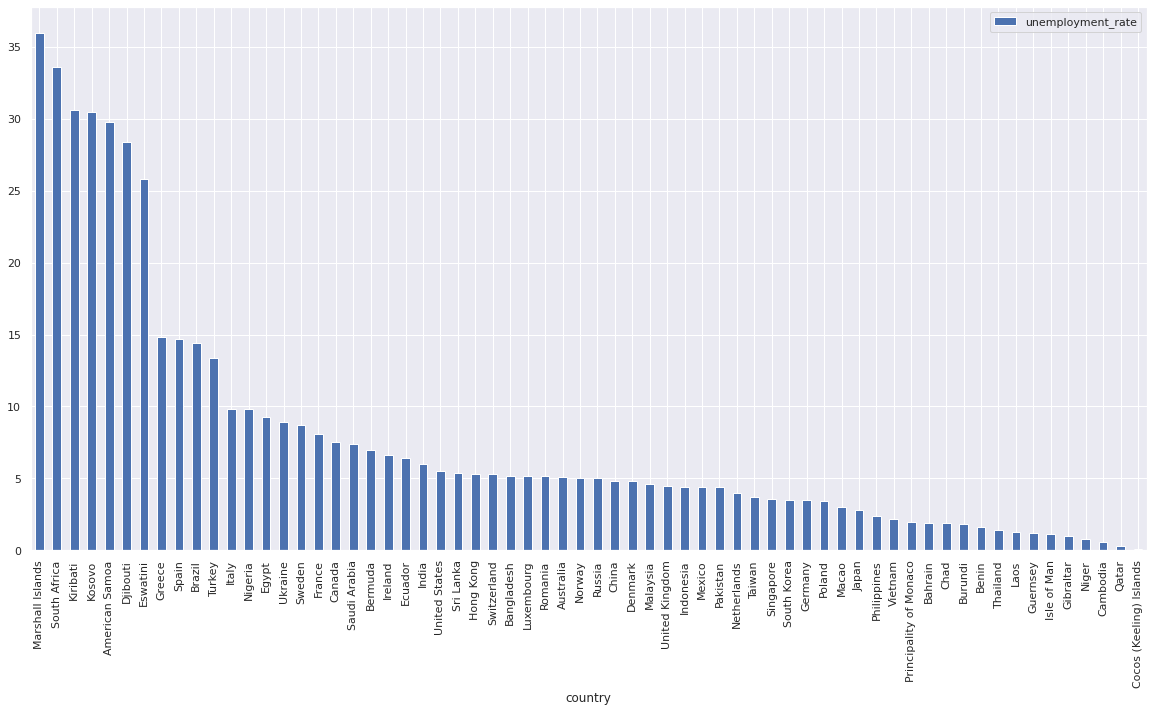

In [8]:
# Ploting unemployment_rate Vs. country
unemployment_df.plot(x='country', y='unemployment_rate', rot=90, kind='bar', figsize=(20,10))

> #### From the above grapgh it can be infered that only top 11 countries from DataFrame has unemployment rate higher than 10, other coutries have employment rate below 10.

In [9]:
# The average unemployment rate
unemployment_df['unemployment_rate'].mean()

7.8234375

In [10]:
# Total countries with unemployment rate less than Average
len(unemployment_df[unemployment_df['unemployment_rate']<7.8234375])

47

> #### Only 17 Countries in the Dataframe out of 64 with unemployment_rate above average

In [11]:
# Top 10 countries with highest unemployment rate
top10_unemployment_df = unemployment_df.sort_values(by='unemployment_rate',ascending=False)[:10]
top10_unemployment_df

,country,unemployment_rate
0,Marshall Islands,36.0
1,South Africa,33.6
2,Kiribati,30.6
3,Kosovo,30.5
4,American Samoa,29.8
5,Djibouti,28.4
6,Eswatini,25.8
7,Greece,14.8
8,Spain,14.7
9,Brazil,14.4


<AxesSubplot:xlabel='country'>

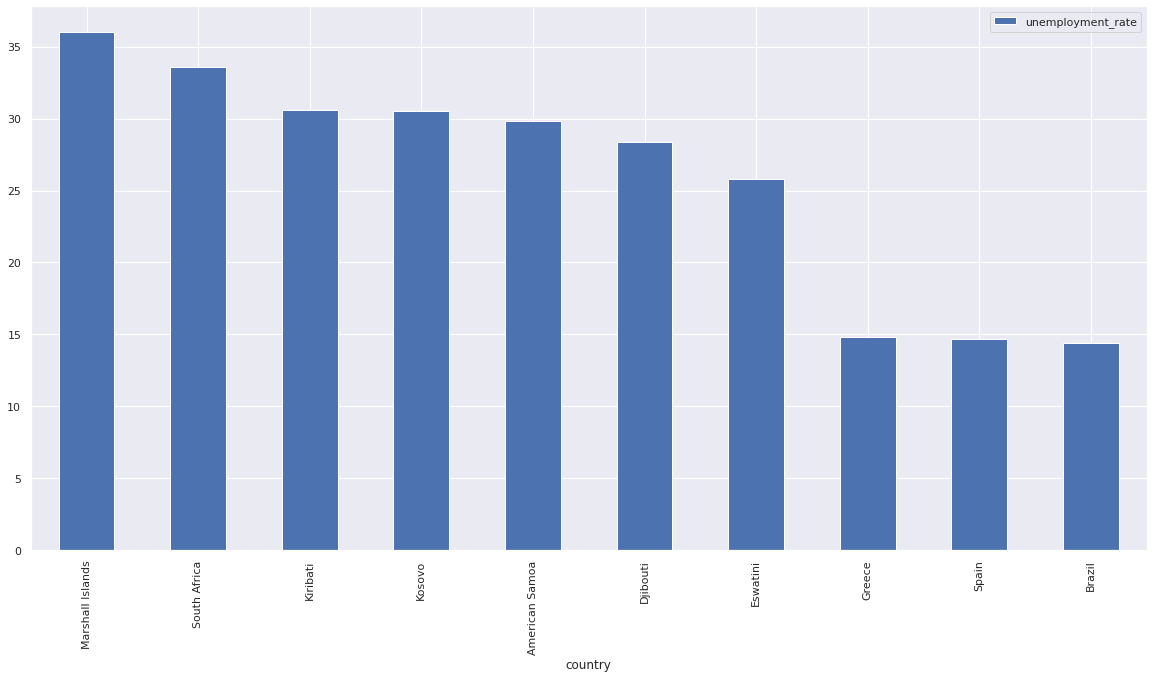

In [12]:
# Ploting unemployment_rate Vs. country for top 10 countries with respect to unemployment_rate
top10_unemployment_df.plot(x='country', y='unemployment_rate', rot=90, kind='bar', figsize=(20,10))

### Richest Countries DataFrame

In [13]:
rich_country_df = pd.read_csv("/kaggle/input/world-economic-data/richest_countries.csv")
# First 5 rows in the dataframe
rich_country_df.head()

,country,gdp_per_capita
0,Luxembourg,134754
1,Singapore,116486
2,Ireland,106456
3,Qatar,93521
4,Bermuda,85192


In [14]:
# Checking the shape of data frame
rich_country_df.shape

(50, 2)

In [15]:
# Checking DataFrame for Total No.of Unique Entries
len(rich_country_df['country'].unique())
# As the count is same as no.of rows, hence no duplicate countries in the dataframe

50

In [16]:
# Checking for null values
rich_country_df.isna().sum()

country           0
gdp_per_capita    0
dtype: int64

In [17]:
# General information about Dataframe
rich_country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   country         50 non-null     object
 1   gdp_per_capita  50 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 928.0+ bytes


In [18]:
# Staistical Information about Dataframe
rich_country_df.describe()

,gdp_per_capita
count,50.000000
mean,54088.180000
std,22709.045634
min,30422.000000
25%,36940.500000
50%,47316.000000
75%,62656.250000
max,134754.000000


<AxesSubplot:xlabel='country'>

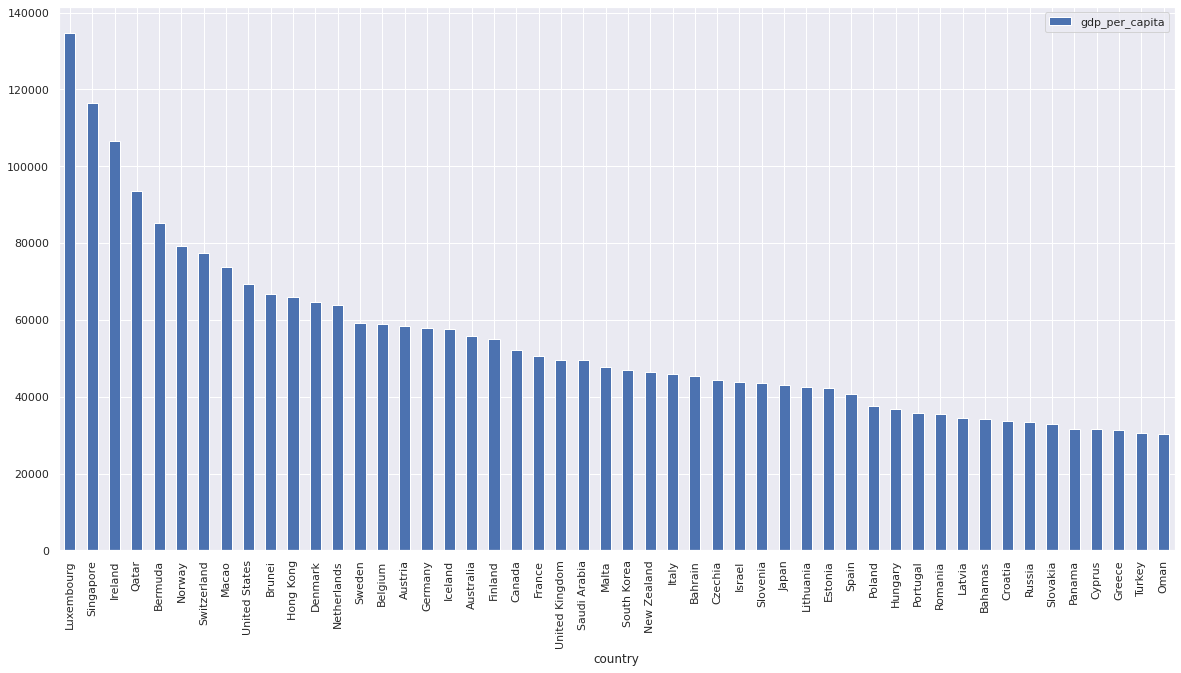

In [19]:
# Ploting gdp per capita Vs. country
rich_country_df.plot(x='country', y='gdp_per_capita', rot=90, kind='bar', figsize=(20,10))

In [20]:
# The Average gdp per capita across countries
rich_country_df['gdp_per_capita'].mean()

54088.18

In [21]:
len(rich_country_df[rich_country_df['gdp_per_capita']<54088.18])

30

> #### 30 countries out of 50 have gdp_per_capita lower than Average

In [22]:
# Top 10 countries with highest gdp per capita
top10_rich_country_df = rich_country_df.sort_values(by='gdp_per_capita',ascending=False)[:10]
top10_rich_country_df

,country,gdp_per_capita
0,Luxembourg,134754
1,Singapore,116486
2,Ireland,106456
3,Qatar,93521
4,Bermuda,85192
5,Norway,79201
6,Switzerland,77324
7,Macao,73802
8,United States,69288
9,Brunei,66620


<AxesSubplot:xlabel='country'>

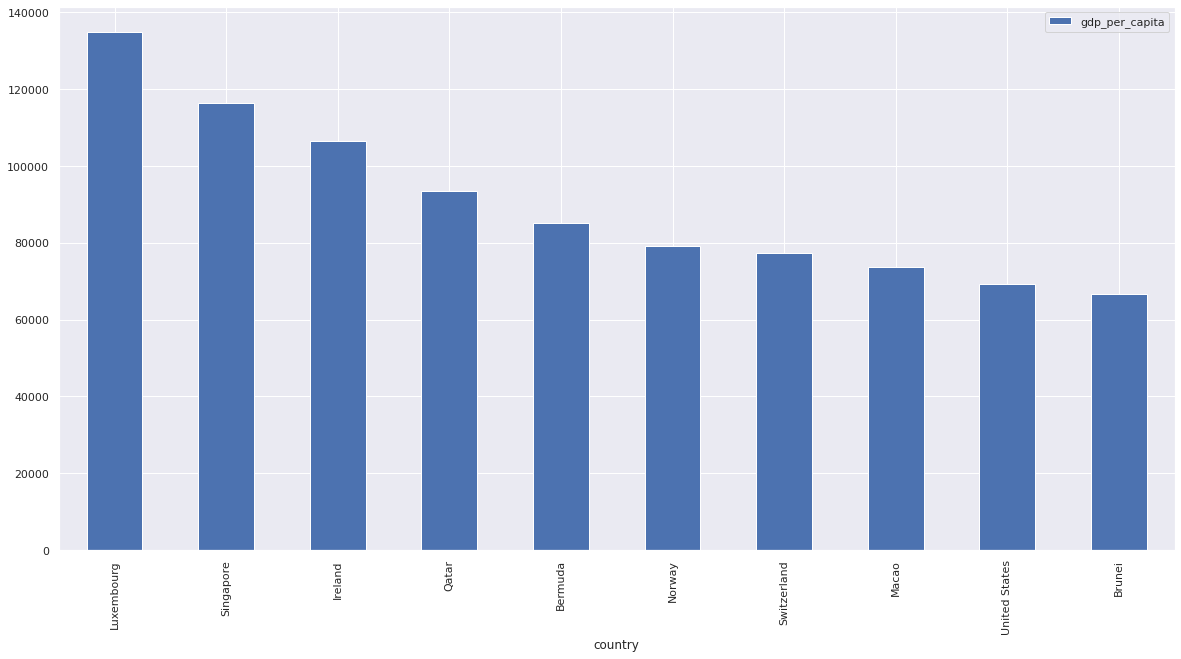

In [23]:
# Ploting gdp_per_capita Vs. country for top 10 countries with respect to gdp_per_capita
top10_rich_country_df.plot(x='country', y='gdp_per_capita', rot=90, kind='bar', figsize=(20,10))

### Tourism Dataframe

In [24]:
tourism_df = pd.read_csv("/kaggle/input/world-economic-data/tourism.csv")
# First 5 rows in the dataframe
tourism_df.head()

,country,tourists_in_millions,receipts_in_billions,receipts_per_tourist,percentage_of_gdp
0,France,117.1,35.96,307,1.2
1,Mexico,51.1,11.45,224,0.9
2,United States,45.0,84.21,1870,0.4
3,Italy,38.4,20.46,533,1.0
4,Hungary,31.6,4.22,133,2.3


In [25]:
# Checking the shape of data frame
tourism_df.shape

(41, 5)

In [26]:
# Checking DataFrame for Total No.of Unique Entries
len(tourism_df['country'].unique())
# As the count is same as no.of rows, hence no duplicate countries in the dataframe

41

In [27]:
# Checking for null values
tourism_df.isna().sum()

country                 0
tourists_in_millions    0
receipts_in_billions    0
receipts_per_tourist    0
percentage_of_gdp       0
dtype: int64

In [28]:
# Checking for correlation between various columns in the dataframe
tourism_df.corr()

,tourists_in_millions,receipts_in_billions,receipts_per_tourist,percentage_of_gdp
tourists_in_millions,1.000000,0.468412,-0.224636,-0.099293
receipts_in_billions,0.468412,1.000000,0.158790,-0.048773
receipts_per_tourist,-0.224636,0.158790,1.000000,0.103868
percentage_of_gdp,-0.099293,-0.048773,0.103868,1.000000


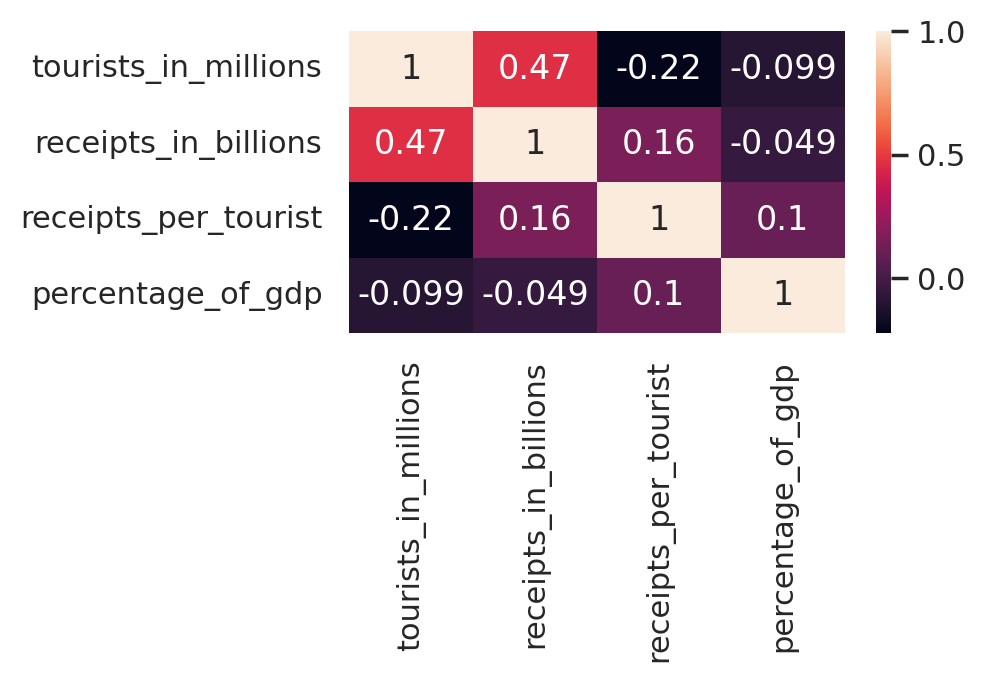

In [29]:
# Heatmap for tourism_df
plt.figure(figsize=(4,2),dpi=200)
sns.heatmap(tourism_df.corr(), annot=True)
plt.show();

In [30]:
# General information about Dataframe
tourism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               41 non-null     object 
 1   tourists_in_millions  41 non-null     float64
 2   receipts_in_billions  41 non-null     float64
 3   receipts_per_tourist  41 non-null     int64  
 4   percentage_of_gdp     41 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.7+ KB


In [31]:
# Staistical Information about Dataframe
tourism_df.describe()

,tourists_in_millions,receipts_in_billions,receipts_per_tourist,percentage_of_gdp
count,41.000000,41.000000,41.000000,41.000000
mean,11.209756,11.256341,2930.512195,3.482927
std,20.819376,16.595482,4735.728456,5.519914
min,0.000000,0.090000,80.000000,0.200000
25%,2.500000,2.200000,533.000000,0.800000
50%,4.100000,4.510000,1018.000000,1.700000
75%,8.100000,11.780000,2882.000000,3.400000
max,117.100000,84.210000,24601.000000,31.600000


##### **country vs. tourists_in_millions**

<AxesSubplot:xlabel='country'>

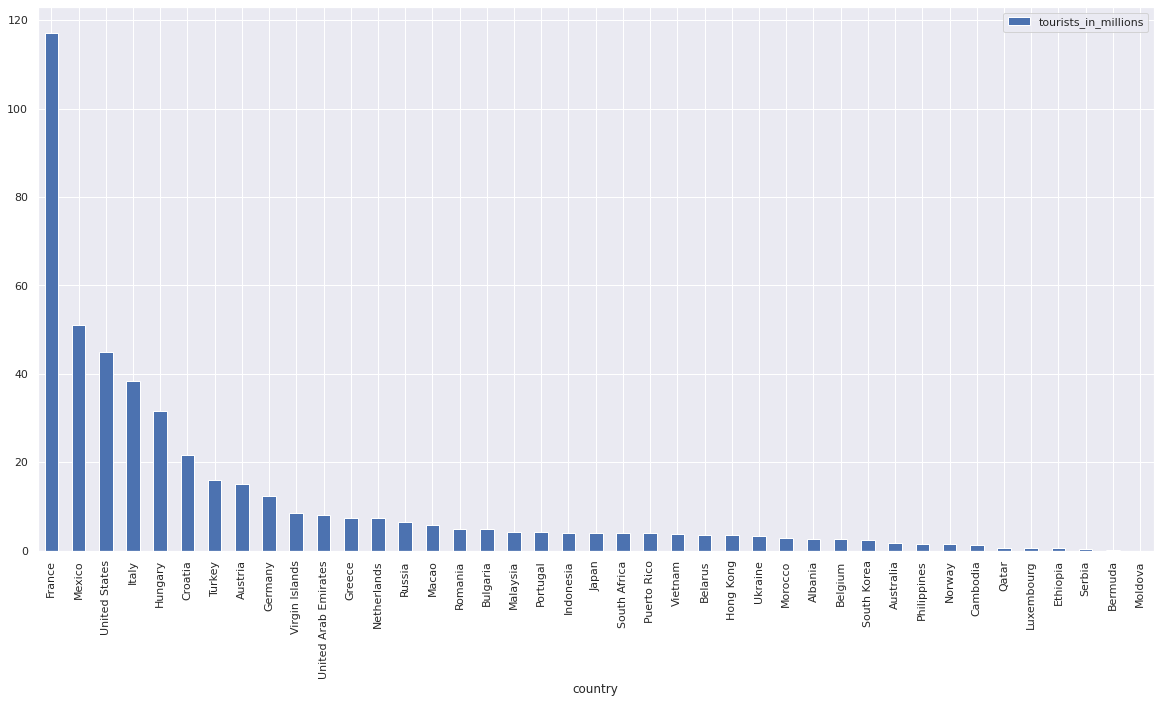

In [32]:
# Countries in accordance with tourists_in_millions
tourists_in_millions_tourism_df = tourism_df.sort_values(by='tourists_in_millions',ascending=False)
tourists_in_millions_tourism_df.plot(y='tourists_in_millions', x='country', rot=90, kind='bar', figsize=(20,10))

In [33]:
# Top 10 countries with highest tourist visits
top10_tourism_df = tourism_df.sort_values(by='tourists_in_millions',ascending=False)[:10]
top10_tourism_df

,country,tourists_in_millions,receipts_in_billions,receipts_per_tourist,percentage_of_gdp
0,France,117.1,35.96,307,1.2
1,Mexico,51.1,11.45,224,0.9
2,United States,45.0,84.21,1870,0.4
3,Italy,38.4,20.46,533,1.0
4,Hungary,31.6,4.22,133,2.3
5,Croatia,21.6,5.63,261,8.3
6,Turkey,16.0,13.77,862,1.7
7,Austria,15.1,15.36,1018,3.2
8,Germany,12.4,58.37,4689,1.4
9,Virgin Islands,8.6,0.69,80,16.3


<AxesSubplot:xlabel='country'>

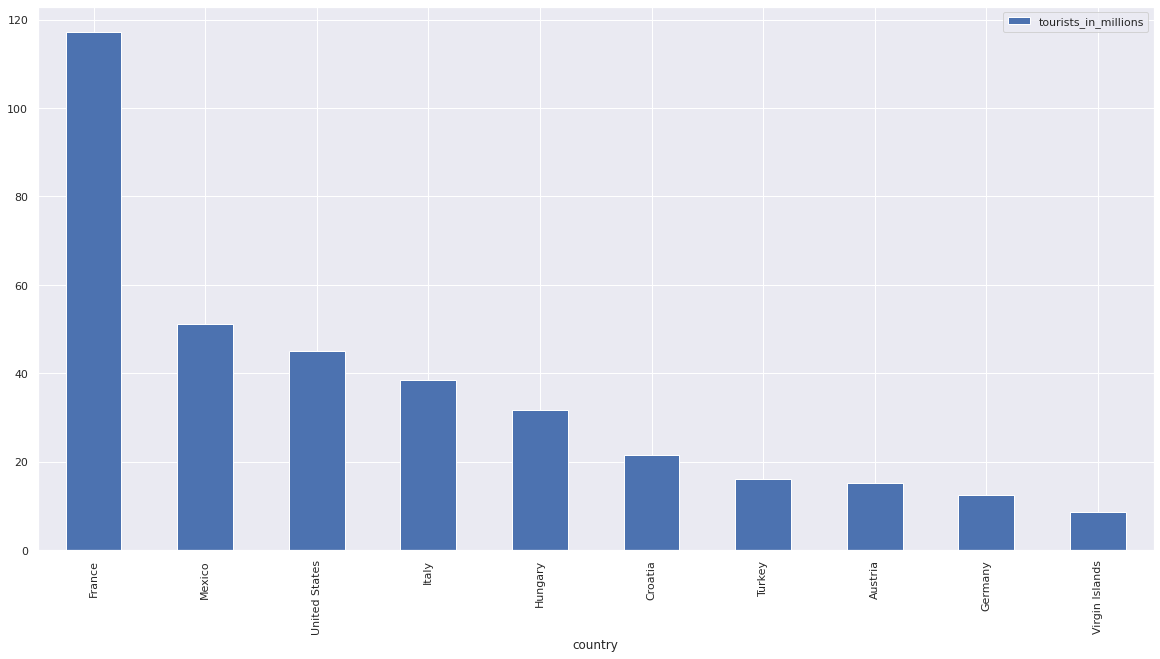

In [34]:
# Top 10 countries in accordance with tourists_in_millions
top10_tourism_df.plot(y='tourists_in_millions', x='country', rot=90, kind='bar', figsize=(20,10))

In [35]:
# Average of tourists across countries in millions
tourism_df['tourists_in_millions'].mean()

11.209756097560975

In [36]:
# Countries with tourists greater than Average
len(tourism_df[tourism_df['tourists_in_millions']>11.209756097560975])

9

>#### There are only 9 countries out of 41 with tourists visits greater than Average.

In [37]:
# Top 3 countries according to tourists
tourism_df.sort_values(by='tourists_in_millions',ascending=False)[:3]

,country,tourists_in_millions,receipts_in_billions,receipts_per_tourist,percentage_of_gdp
0,France,117.1,35.96,307,1.2
1,Mexico,51.1,11.45,224,0.9
2,United States,45.0,84.21,1870,0.4


> #### The no.of tourists visiting "France" is more than double compared to "Mexico" which is standing at 2nd position in terms of 'tourists_in_millions'. The no.of tourists visiting france is thus affecting average.

##### **tourists_in_millions vs. receipts_in_billions**

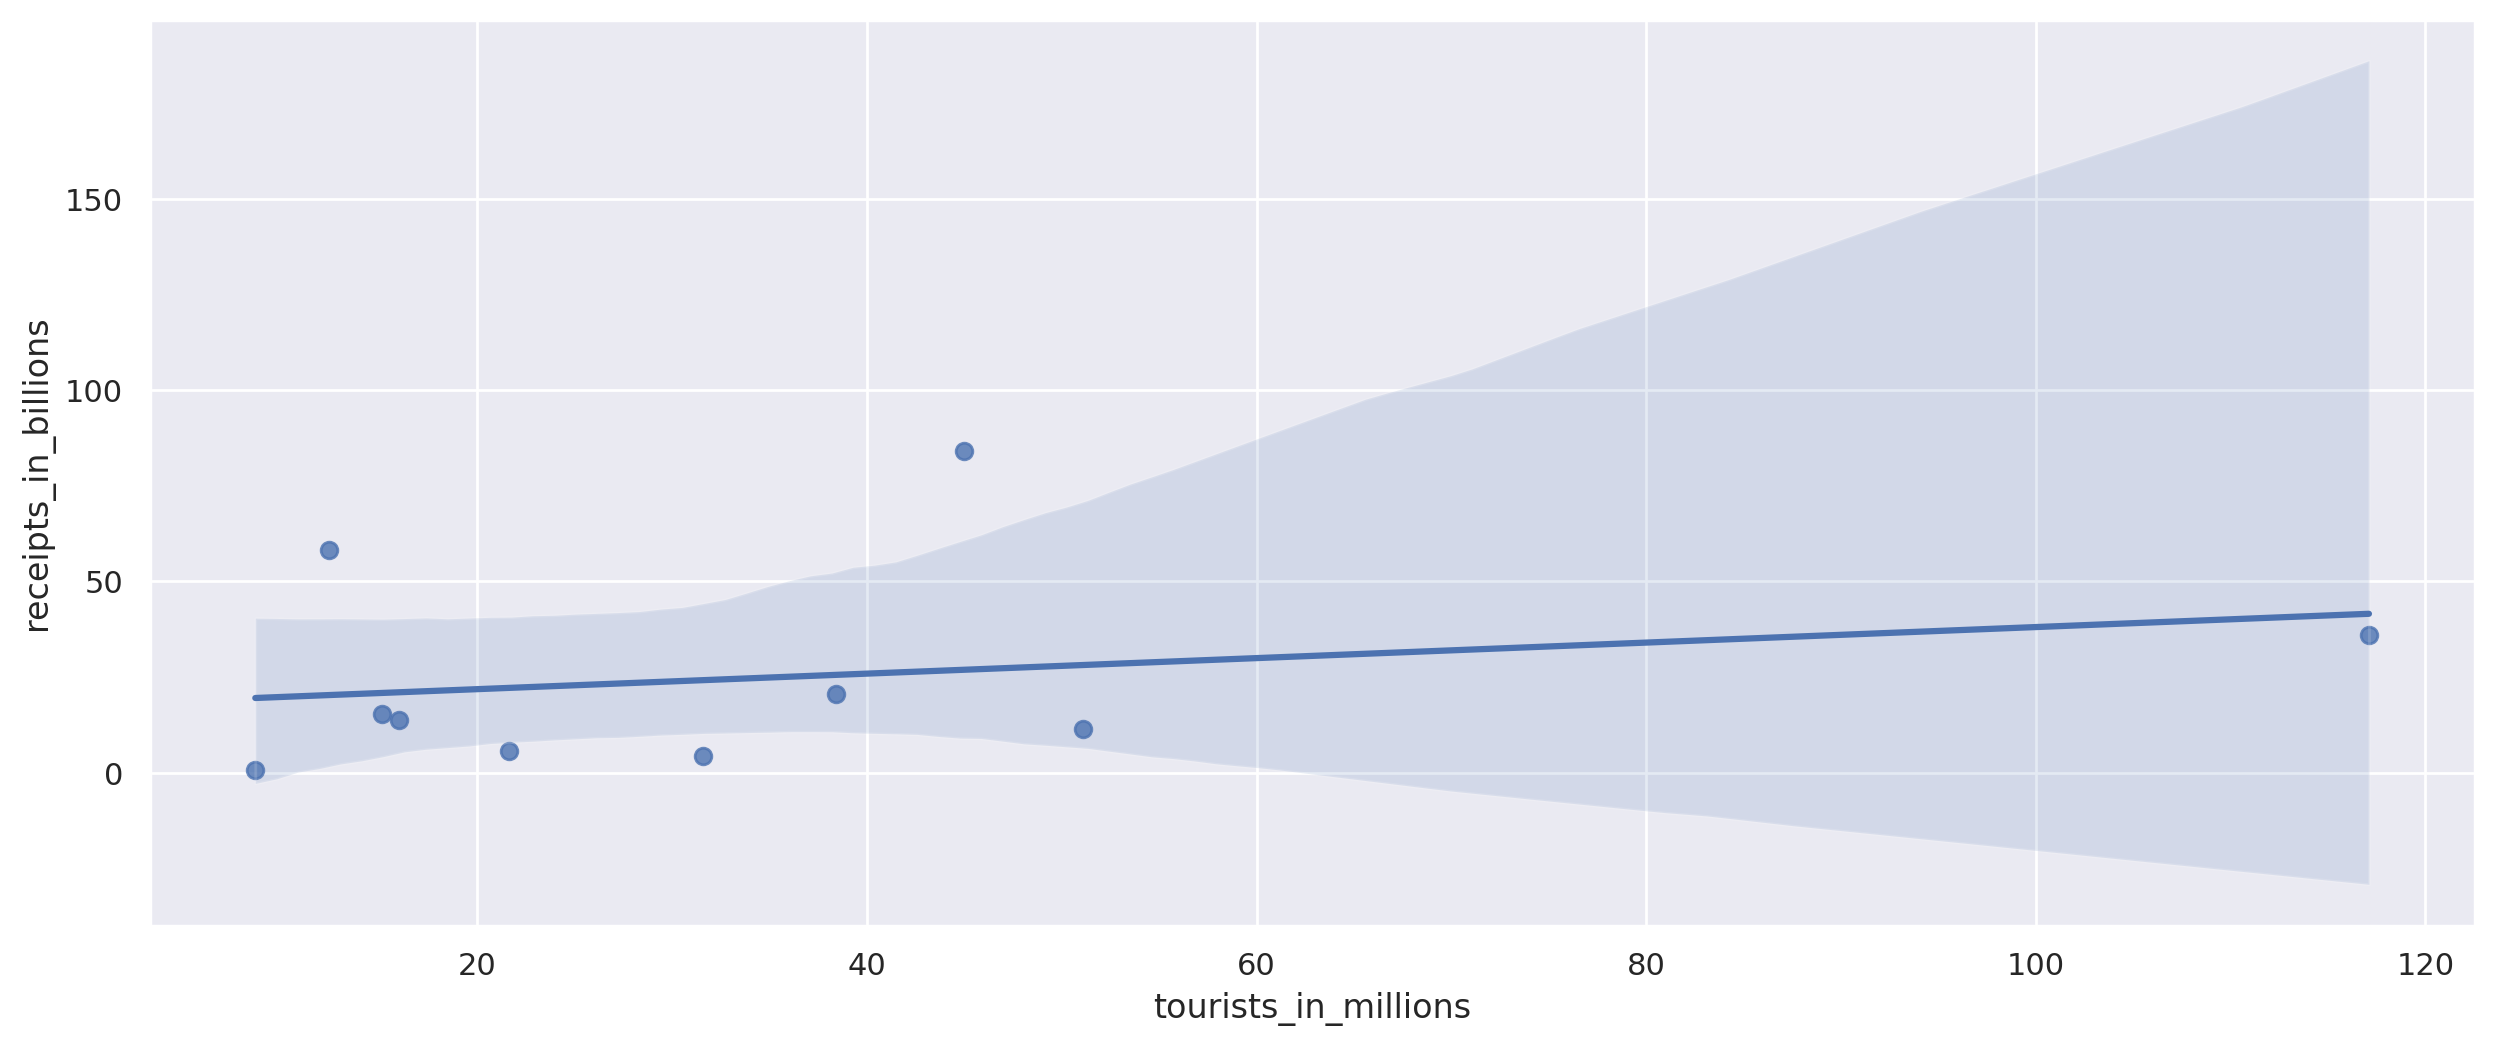

In [38]:
# tourists_in_millions Vs. receipts_in_billions for top 10 countries by tourist visit
plt.figure(figsize=(15,6),dpi=200)
sns.regplot(data=top10_tourism_df, x='tourists_in_millions', y='receipts_in_billions', marker="o")
plt.show();

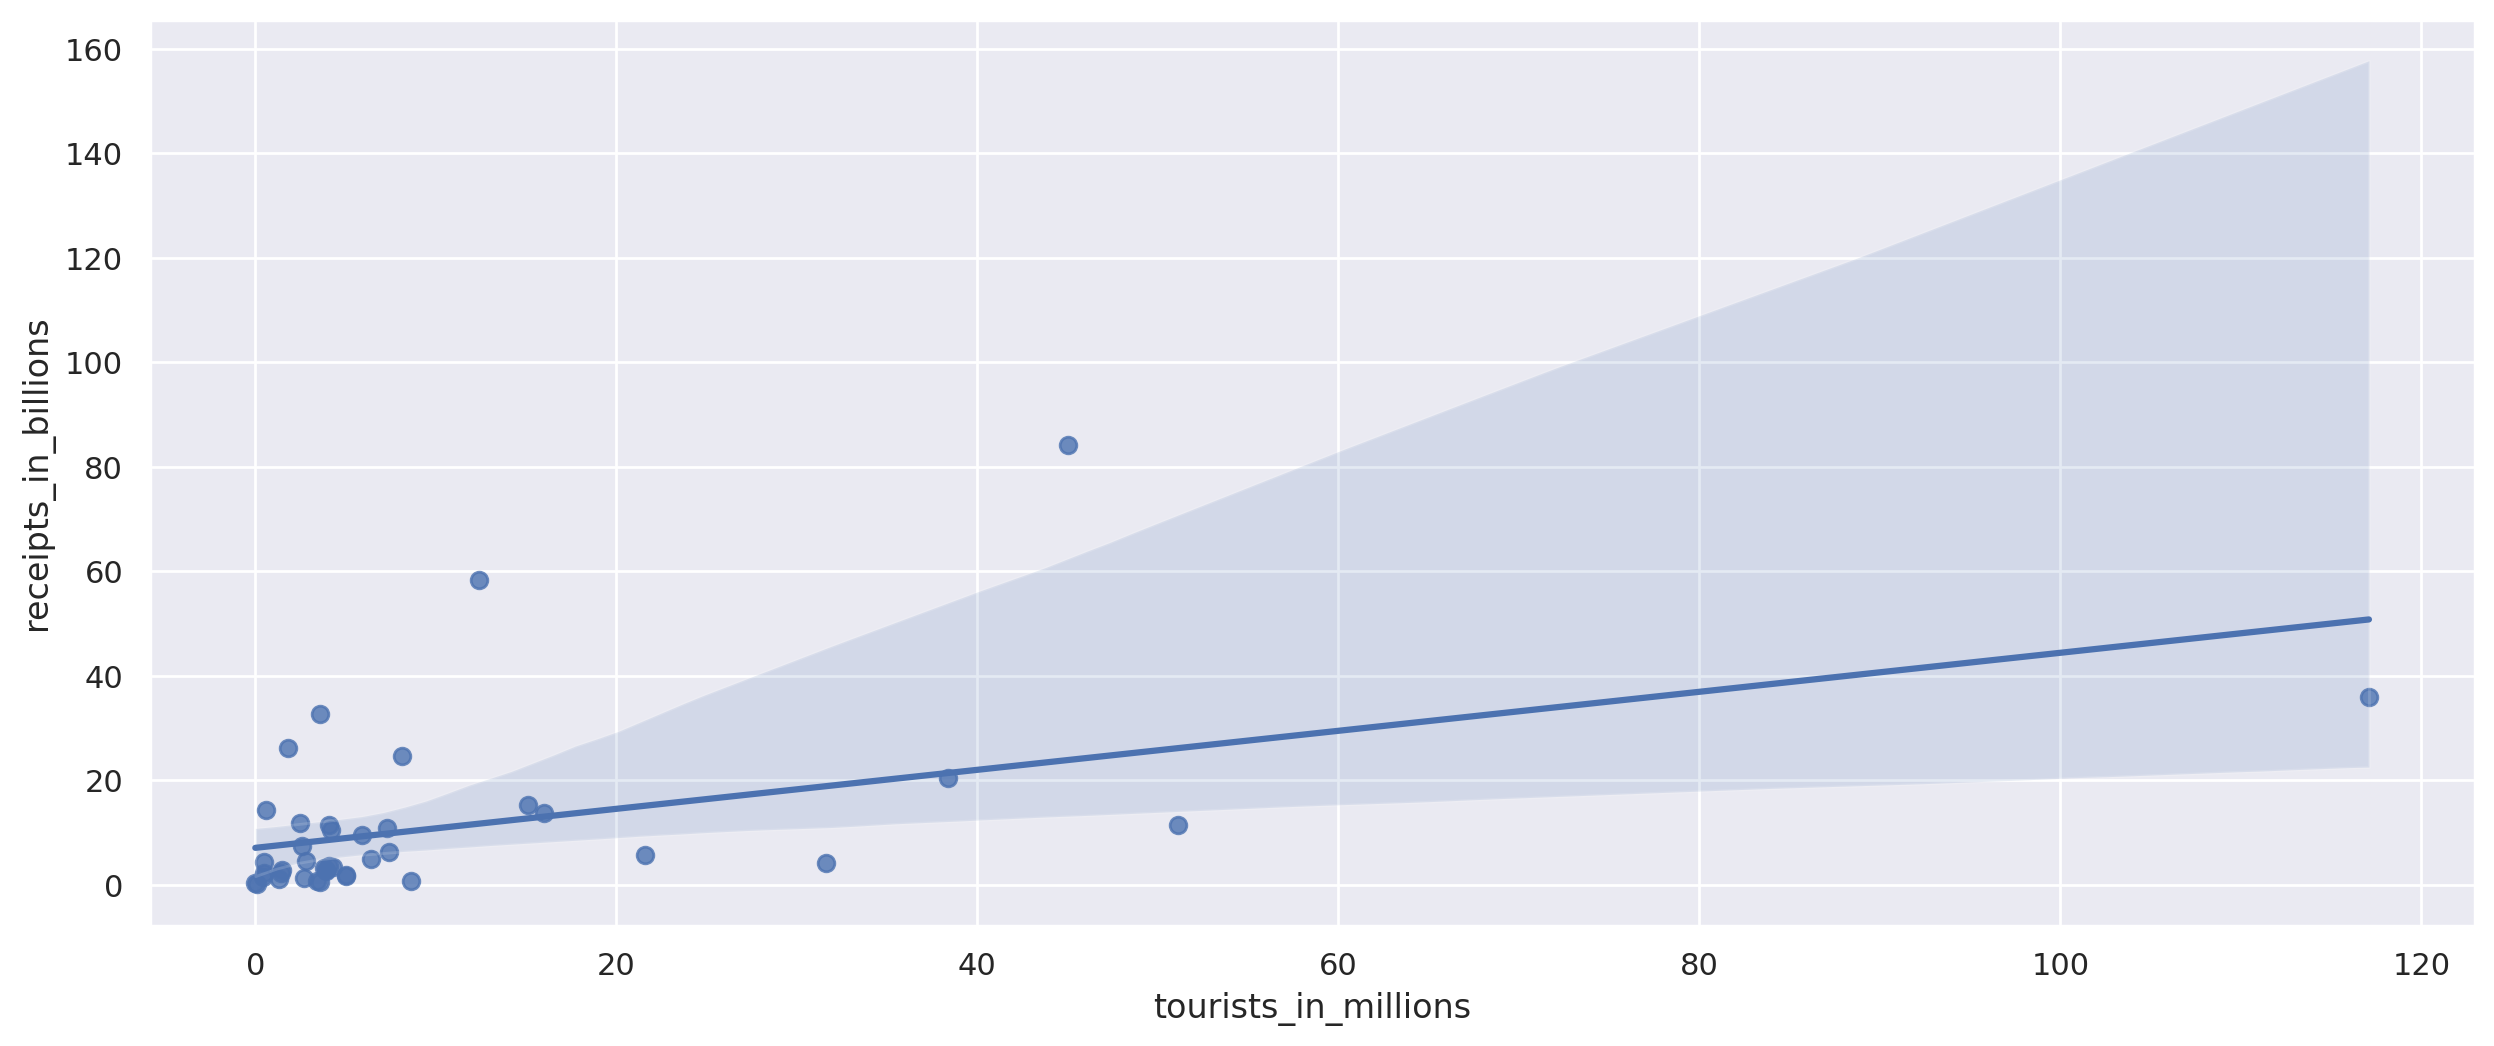

In [39]:
# tourists_in_millions Vs. receipts_in_billions for all countries

plt.figure(figsize=(15,6),dpi=200)
sns.regplot(data=tourism_df, x='tourists_in_millions', y='receipts_in_billions', marker="o")
plt.show();

> #### The Correlation between tourism_in_millions and receipts_in-billions is 0.468412. No Clear linear relation between tourism_in_millions and receipts_in-billions because of outliers.

##### **country vs. receipts_in_billions**

<AxesSubplot:xlabel='country'>

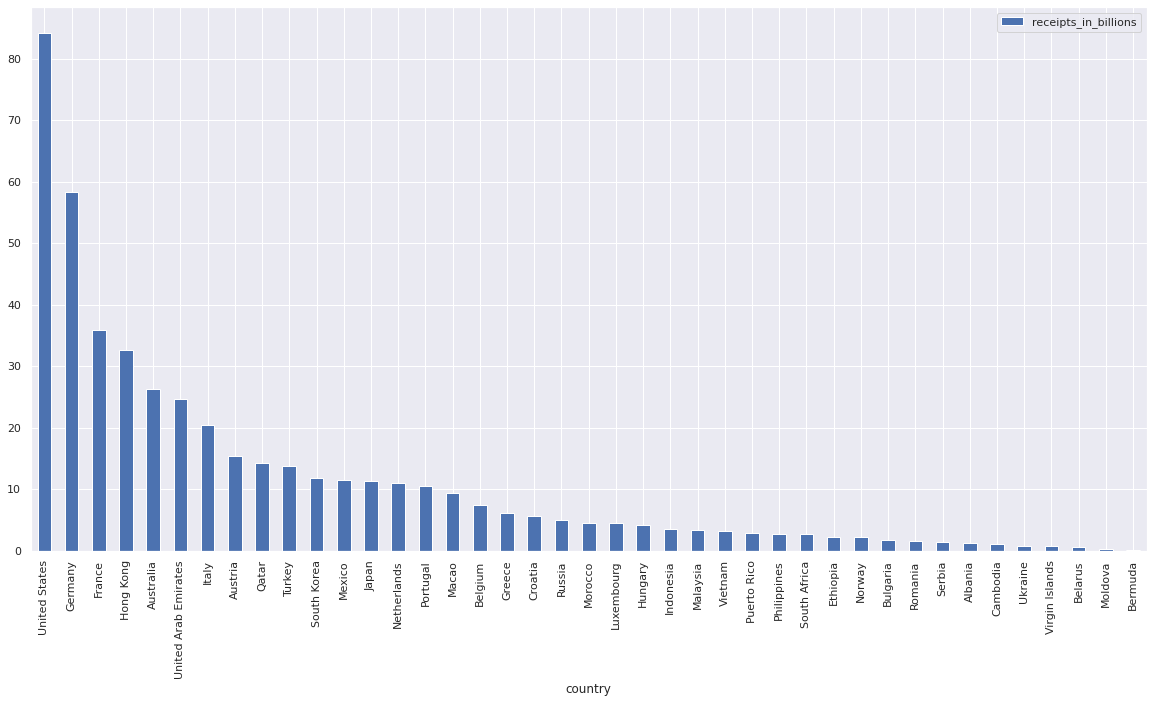

In [40]:
# Countries in accordance with receipts_in_billions
receipts_in_billions_tourism_df = tourism_df.sort_values(by='receipts_in_billions',ascending=False)
receipts_in_billions_tourism_df.plot(y='receipts_in_billions', x='country', rot=90, kind='bar', figsize=(20,10))

In [41]:
# Top 10 countries with highest receipts
top10_receipts_in_billions_tourism_df = tourism_df.sort_values(by='receipts_in_billions',ascending=False)[:10]
top10_receipts_in_billions_tourism_df[['country','receipts_in_billions','tourists_in_millions']]

,country,receipts_in_billions,tourists_in_millions
2,United States,84.21,45.0
8,Germany,58.37,12.4
0,France,35.96,117.1
25,Hong Kong,32.70,3.6
31,Australia,26.23,1.8
10,United Arab Emirates,24.62,8.1
3,Italy,20.46,38.4
7,Austria,15.36,15.1
35,Qatar,14.32,0.6
6,Turkey,13.77,16.0


<AxesSubplot:xlabel='country'>

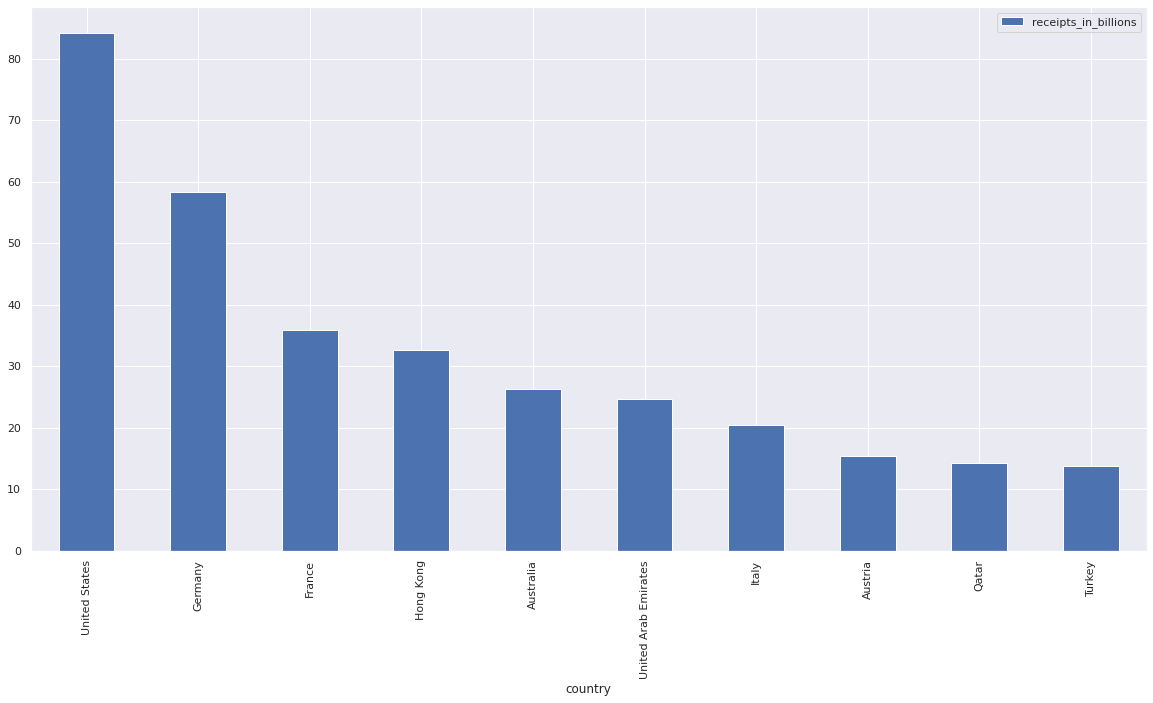

In [42]:
# Top 10 countries in accordance with receipts_in_billions
top10_receipts_in_billions_tourism_df.plot(y='receipts_in_billions', x='country', rot=90, kind='bar', figsize=(20,10))

> #### The no.of visitors for France is much greater than that of United States but the receipts_in_billions is less than half compared to United States. This beacuse the receipts_per_tourist is greater in the case of United States and thus the Total no.of Receipts.

##### **Total no.of Receipts = receipts_per_tourist * tourists_in_millions**

In [43]:
# receipts_per_tourist *  tourists_in_millions for United States

top10_receipts_in_billions_tourism_df.iloc[0]['receipts_per_tourist'] * top10_receipts_in_billions_tourism_df.iloc[0]['tourists_in_millions']

# Total no.of Receipts

84150.0

In [44]:
# receipts_per_tourist *  tourists_in_millions for France

top10_receipts_in_billions_tourism_df.iloc[2]['receipts_per_tourist'] * top10_receipts_in_billions_tourism_df.iloc[2]['tourists_in_millions']

# Total no.of Receipts

35949.7

##### **country vs. receipts_per_tourist**

<AxesSubplot:xlabel='country'>

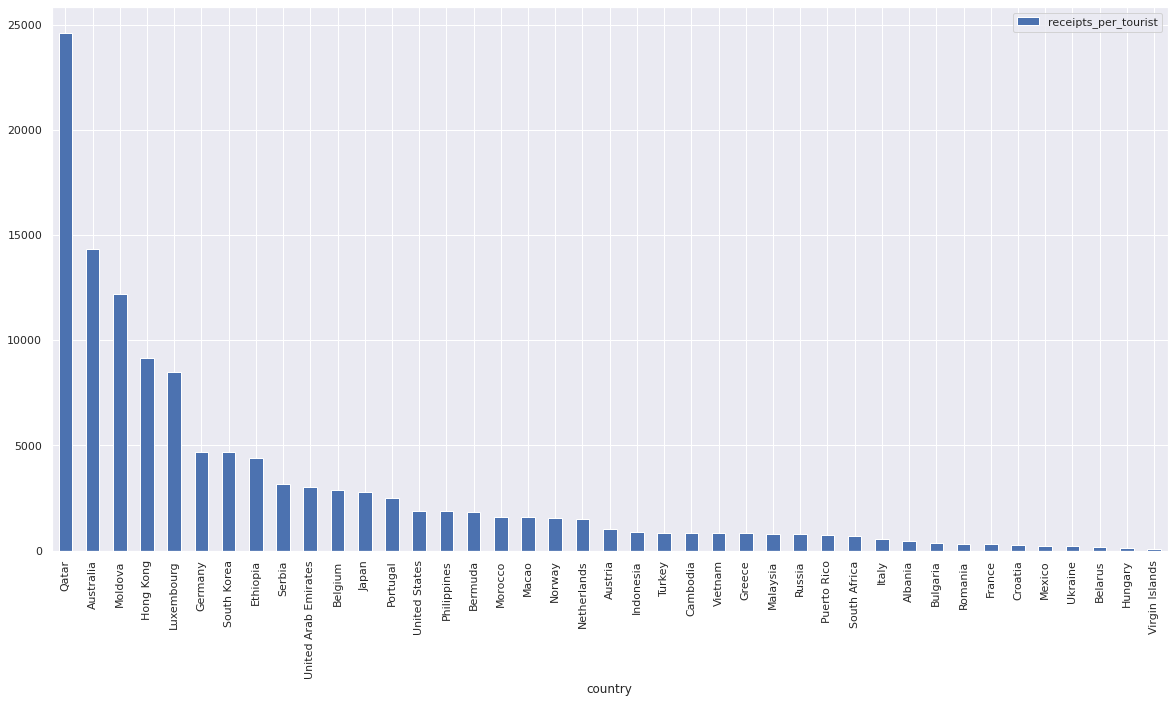

In [45]:
# Countries in accordance with receipts_per_tourist
receipts_per_tourist_tourism_df = tourism_df.sort_values(by='receipts_per_tourist',ascending=False)
receipts_per_tourist_tourism_df.plot(y='receipts_per_tourist', x='country', rot=90, kind='bar', figsize=(20,10))

In [46]:
# Top 10 countries in accordance with receipts_per_tourist
top10_receipts_per_tourist_tourism_df = tourism_df.sort_values(by='receipts_per_tourist',ascending=False)[:10]
top10_receipts_per_tourist_tourism_df

,country,tourists_in_millions,receipts_in_billions,receipts_per_tourist,percentage_of_gdp
35,Qatar,0.6,14.32,24601,8.0
31,Australia,1.8,26.23,14351,1.7
40,Moldova,0.0,0.35,12207,2.6
25,Hong Kong,3.6,32.70,9161,8.9
36,Luxembourg,0.5,4.45,8484,5.1
8,Germany,12.4,58.37,4689,1.4
30,South Korea,2.5,11.78,4675,0.7
37,Ethiopia,0.5,2.28,4405,2.1
38,Serbia,0.4,1.42,3188,2.3
10,United Arab Emirates,8.1,24.62,3045,6.9


<AxesSubplot:xlabel='country'>

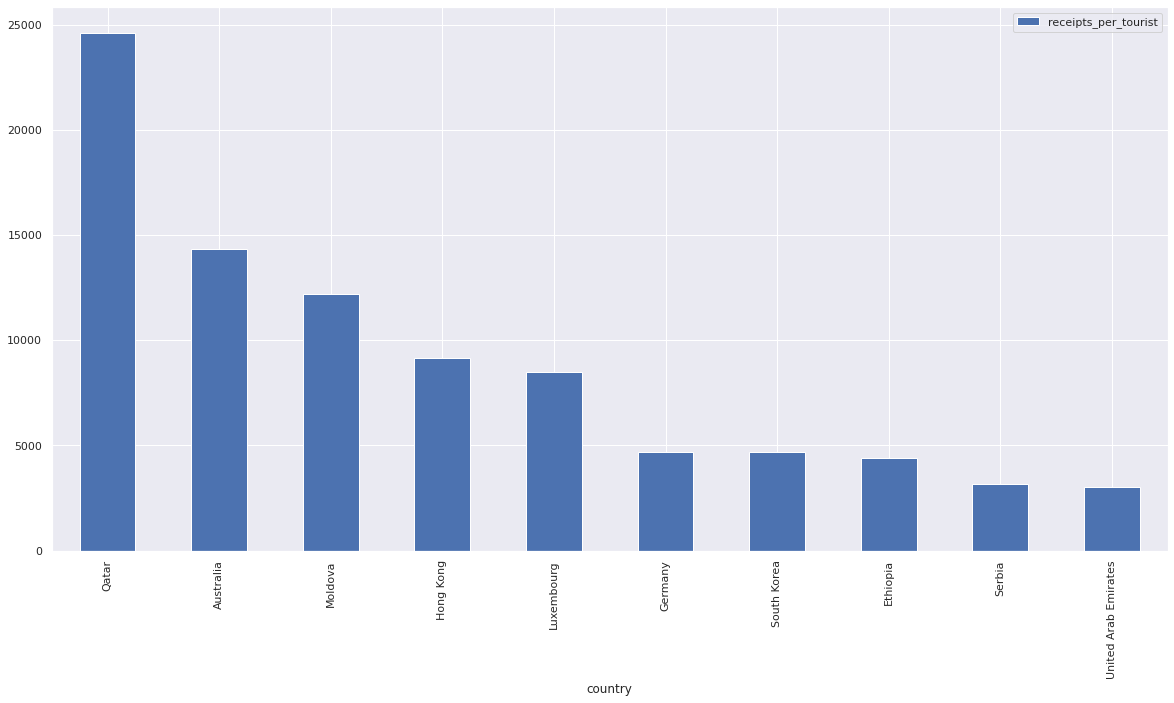

In [47]:
top10_receipts_per_tourist_tourism_df.plot(y='receipts_per_tourist', x='country', rot=90, kind='bar', figsize=(20,10))

> #### Skipping scatterplot for "receipts_per_tourist" column with other columns as the correlation is not linear and no clear relationship.

##### **country vs. percentage_of_gdp**

<AxesSubplot:xlabel='country'>

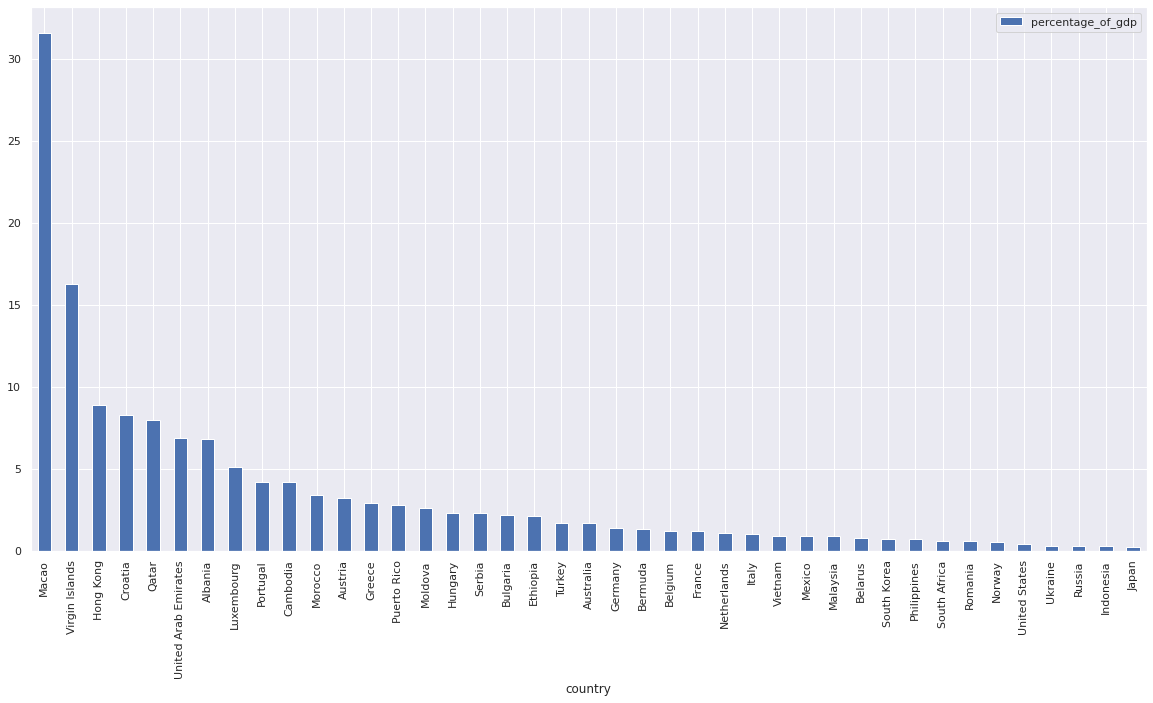

In [48]:
# Countries in accordance with percentage_of_gdp
percentage_of_gdp_tourism_df = tourism_df.sort_values(by='percentage_of_gdp',ascending=False)
percentage_of_gdp_tourism_df.plot(y='percentage_of_gdp', x='country', rot=90, kind='bar', figsize=(20,10))

In [49]:
# Top 10 countries in accordance with percentage_of_gdp
top10_percentage_of_gdp_tourism_df = tourism_df.sort_values(by='percentage_of_gdp',ascending=False)[:10]
top10_percentage_of_gdp_tourism_df

,country,tourists_in_millions,receipts_in_billions,receipts_per_tourist,percentage_of_gdp
14,Macao,5.9,9.44,1601,31.6
9,Virgin Islands,8.6,0.69,80,16.3
25,Hong Kong,3.6,32.70,9161,8.9
5,Croatia,21.6,5.63,261,8.3
35,Qatar,0.6,14.32,24601,8.0
10,United Arab Emirates,8.1,24.62,3045,6.9
28,Albania,2.7,1.24,468,6.8
36,Luxembourg,0.5,4.45,8484,5.1
18,Portugal,4.2,10.52,2500,4.2
34,Cambodia,1.3,1.12,857,4.2


> #### The Below graph shows top 10 countries with percentage_of_gdp contribution with respect to total gdp

<AxesSubplot:xlabel='country'>

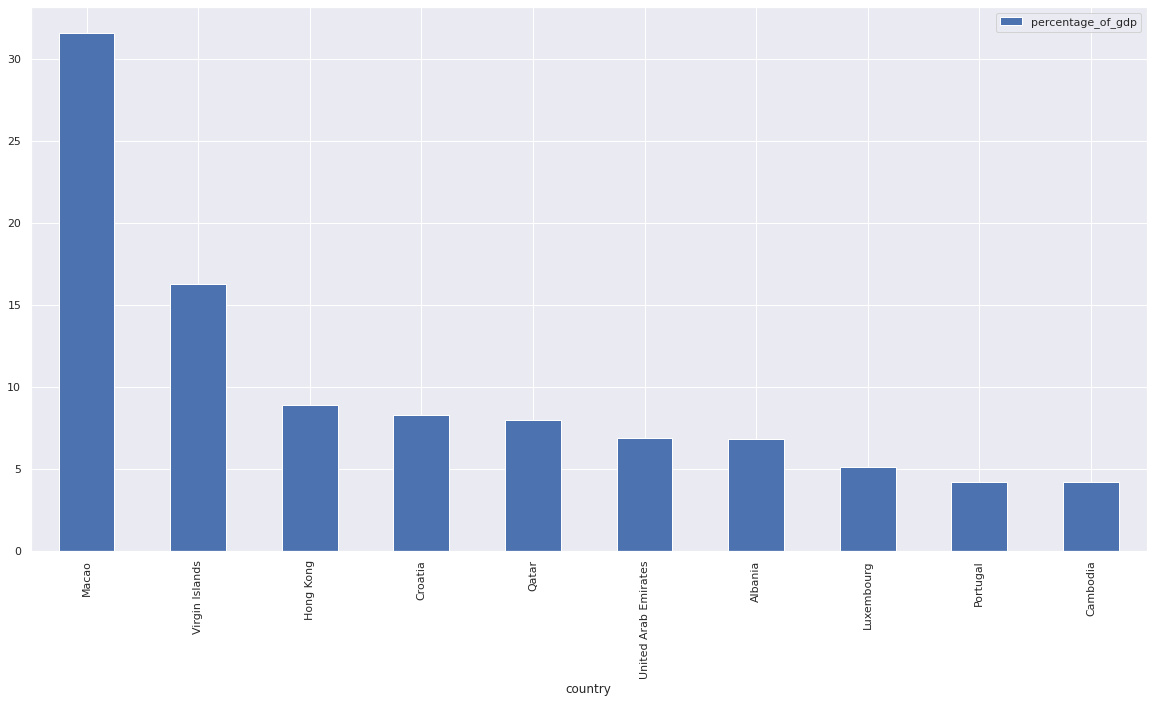

In [50]:
# Top 10 countries in accordance with percentage_of_gdp
top10_percentage_of_gdp_tourism_df.plot(y='percentage_of_gdp', x='country', rot=90, kind='bar', figsize=(20,10))

### Corruption Dataframe

In [51]:
corruption_df = pd.read_csv("/kaggle/input/world-economic-data/corruption.csv")
# First 5 rows in the dataframe
corruption_df.head()

,country,annual_income,corruption_index
0,Denmark,68110,12
1,Finland,53660,12
2,New Zealand,45340,12
3,Norway,84090,15
4,Singapore,64010,15


In [52]:
# Checking the shape of data frame
corruption_df.shape

(110, 3)

In [53]:
# Checking DataFrame for Total No.of Unique Entries

len(corruption_df['country'].unique())

# As the count is same as no.of rows, hence no duplicate countries in the dataframe

110

In [54]:
# Checking for null values
corruption_df.isna().sum()

country             0
annual_income       0
corruption_index    0
dtype: int64

In [55]:
# Checking for correlation between various columns in the dataframe
corruption_df.corr()

,annual_income,corruption_index
annual_income,1.000000,-0.916669
corruption_index,-0.916669,1.000000


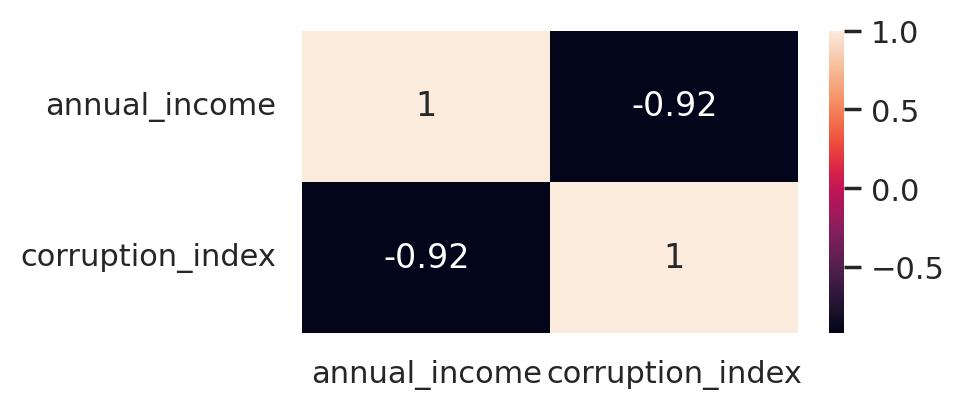

In [56]:
# Heatmap for corruption_df

plt.figure(figsize=(4,2),dpi=200)
sns.heatmap(corruption_df.corr(),annot=True)
plt.show();

In [57]:
# General information about DataFrame

corruption_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   country           110 non-null    object
 1   annual_income     110 non-null    int64 
 2   corruption_index  110 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.7+ KB


In [58]:
# Statistical Information about Dataframe

corruption_df.describe()

,annual_income,corruption_index
count,110.000000,110.000000
mean,17195.727273,59.200000
std,23741.147397,22.170234
min,240.000000,12.000000
25%,1470.000000,41.750000
50%,4130.000000,69.000000
75%,25410.000000,75.000000
max,90360.000000,89.000000


##### **country vs. annual_income**

<AxesSubplot:xlabel='country'>

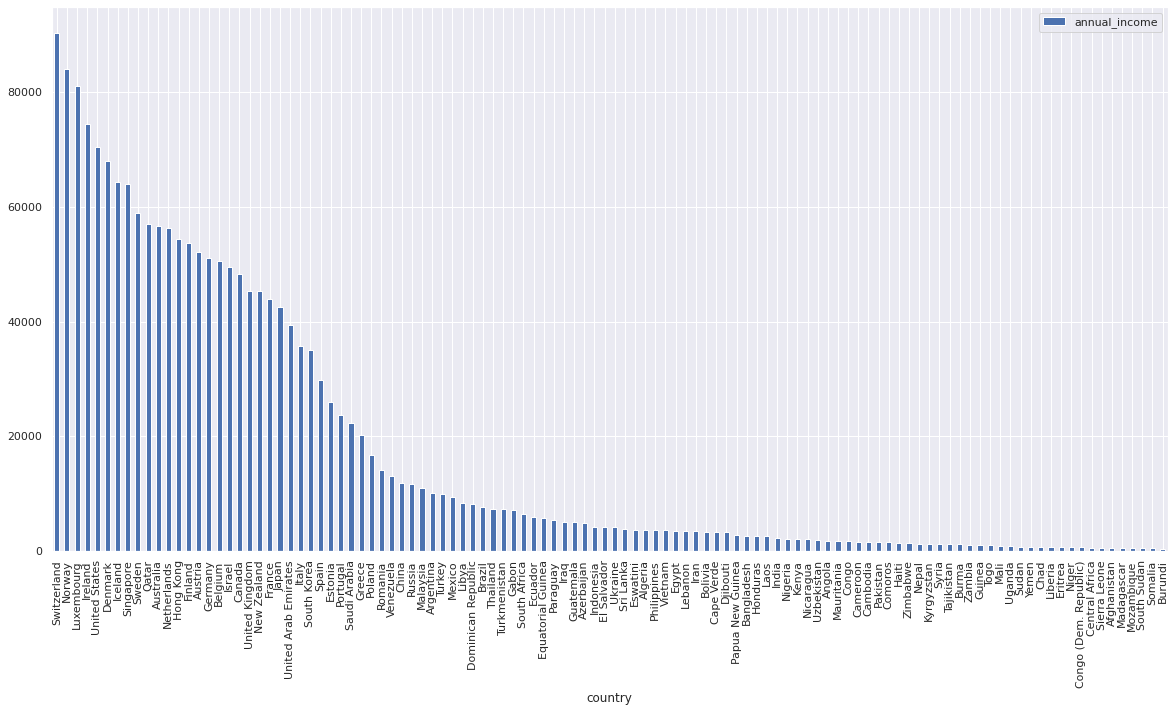

In [59]:
# Countries in accordance with annual_income
annual_income_corruption_df = corruption_df.sort_values(by='annual_income',ascending=False)
annual_income_corruption_df.plot(y='annual_income', x='country', rot=90, kind='bar', figsize=(20,10))

In [60]:
# Top 10 countries with highest annual income
top10_annual_income_corruption_df = corruption_df.sort_values(by='annual_income',ascending=False)[:10]
top10_annual_income_corruption_df

,country,annual_income,corruption_index
6,Switzerland,90360,16
3,Norway,84090,15
8,Luxembourg,81110,19
16,Ireland,74520,26
22,United States,70430,33
0,Denmark,68110,12
15,Iceland,64410,26
4,Singapore,64010,15
5,Sweden,58890,15
23,Qatar,57120,37


<AxesSubplot:xlabel='country'>

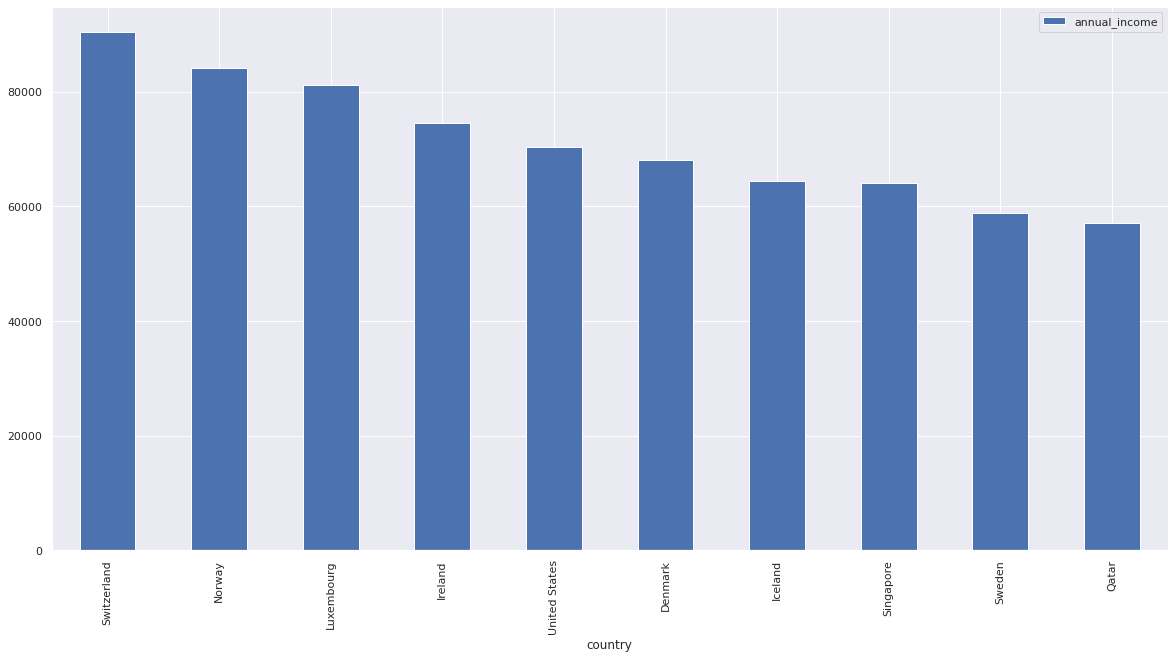

In [61]:
# Top 10 countries with highest annual income
top10_annual_income_corruption_df.plot(y='annual_income', x='country', rot=90, kind='bar', figsize=(20,10))

##### **country vs. corruption_index**

<AxesSubplot:xlabel='country'>

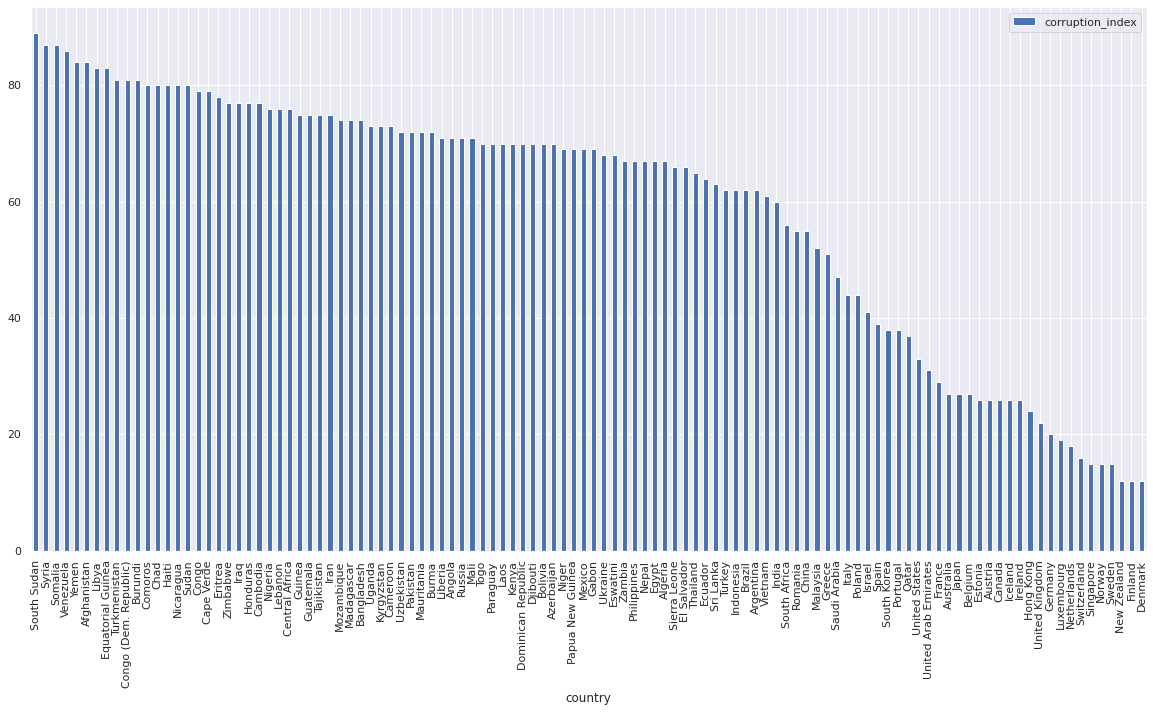

In [62]:
# Countries in accordance with corruption_index
corruption_index_corruption_df = corruption_df.sort_values(by='corruption_index',ascending=False)
corruption_index_corruption_df.plot(y='corruption_index', x='country', rot=90, kind='bar', figsize=(20,10))

In [63]:
# Top 10 countries with highest corruption index
top10_corruption_index_corruption_df = corruption_df.sort_values(by='corruption_index',ascending=False)[:10]
top10_corruption_index_corruption_df

,country,annual_income,corruption_index
109,South Sudan,460,89
108,Syria,1170,87
107,Somalia,450,87
106,Venezuela,13080,86
105,Yemen,670,84
104,Afghanistan,500,84
103,Libya,8430,83
102,Equatorial Guinea,5810,83
101,Turkmenistan,7220,81
100,Congo (Dem. Republic),580,81


<AxesSubplot:xlabel='country'>

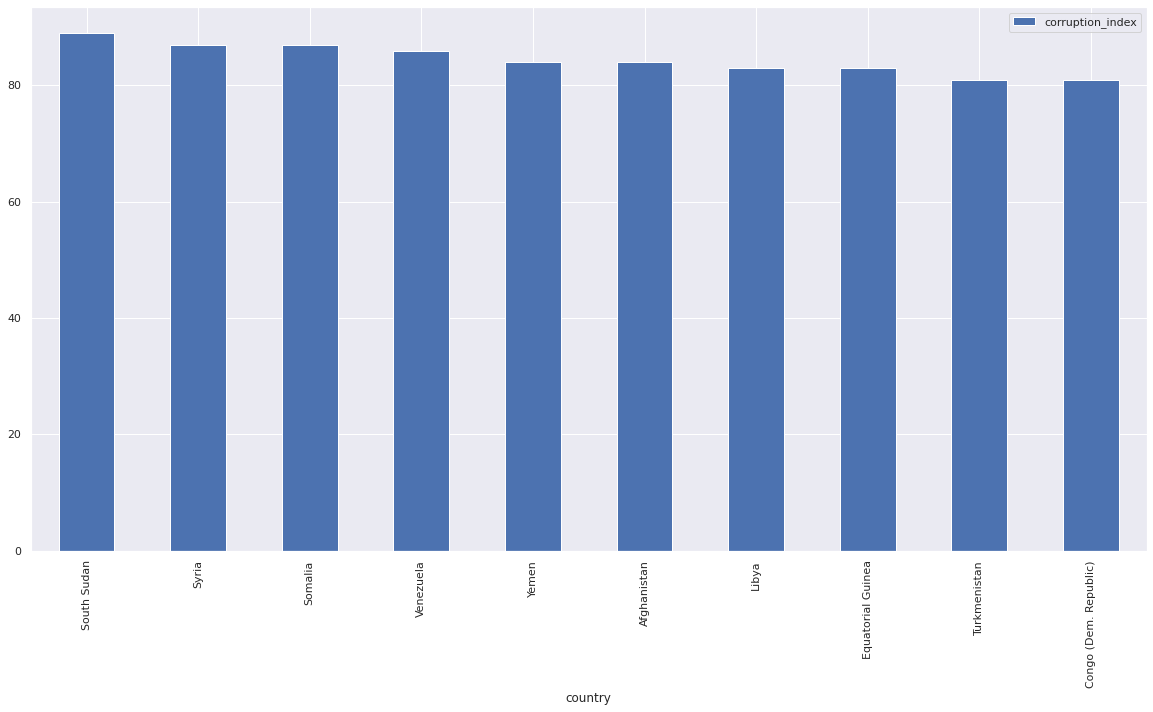

In [64]:
# Top 10 countries with highest corruption index
top10_corruption_index_corruption_df.plot(y='corruption_index', x='country', rot=90, kind='bar', figsize=(20,10))

In [65]:
# Top 3 from with highest annual_income in corruption_index rankings

display(corruption_index_corruption_df[corruption_index_corruption_df['country'] == 'Switzerland'])
display(corruption_index_corruption_df[corruption_index_corruption_df['country'] == 'Norway'])
display(corruption_index_corruption_df[corruption_index_corruption_df['country'] == 'Luxembourg'])

,country,annual_income,corruption_index
6,Switzerland,90360,16


,country,annual_income,corruption_index
3,Norway,84090,15


,country,annual_income,corruption_index
8,Luxembourg,81110,19


> #### The Countries listed above are following the correlation of -0.916669 between annual_income and corruption_index.

##### **annual_income vs. corruption_index**

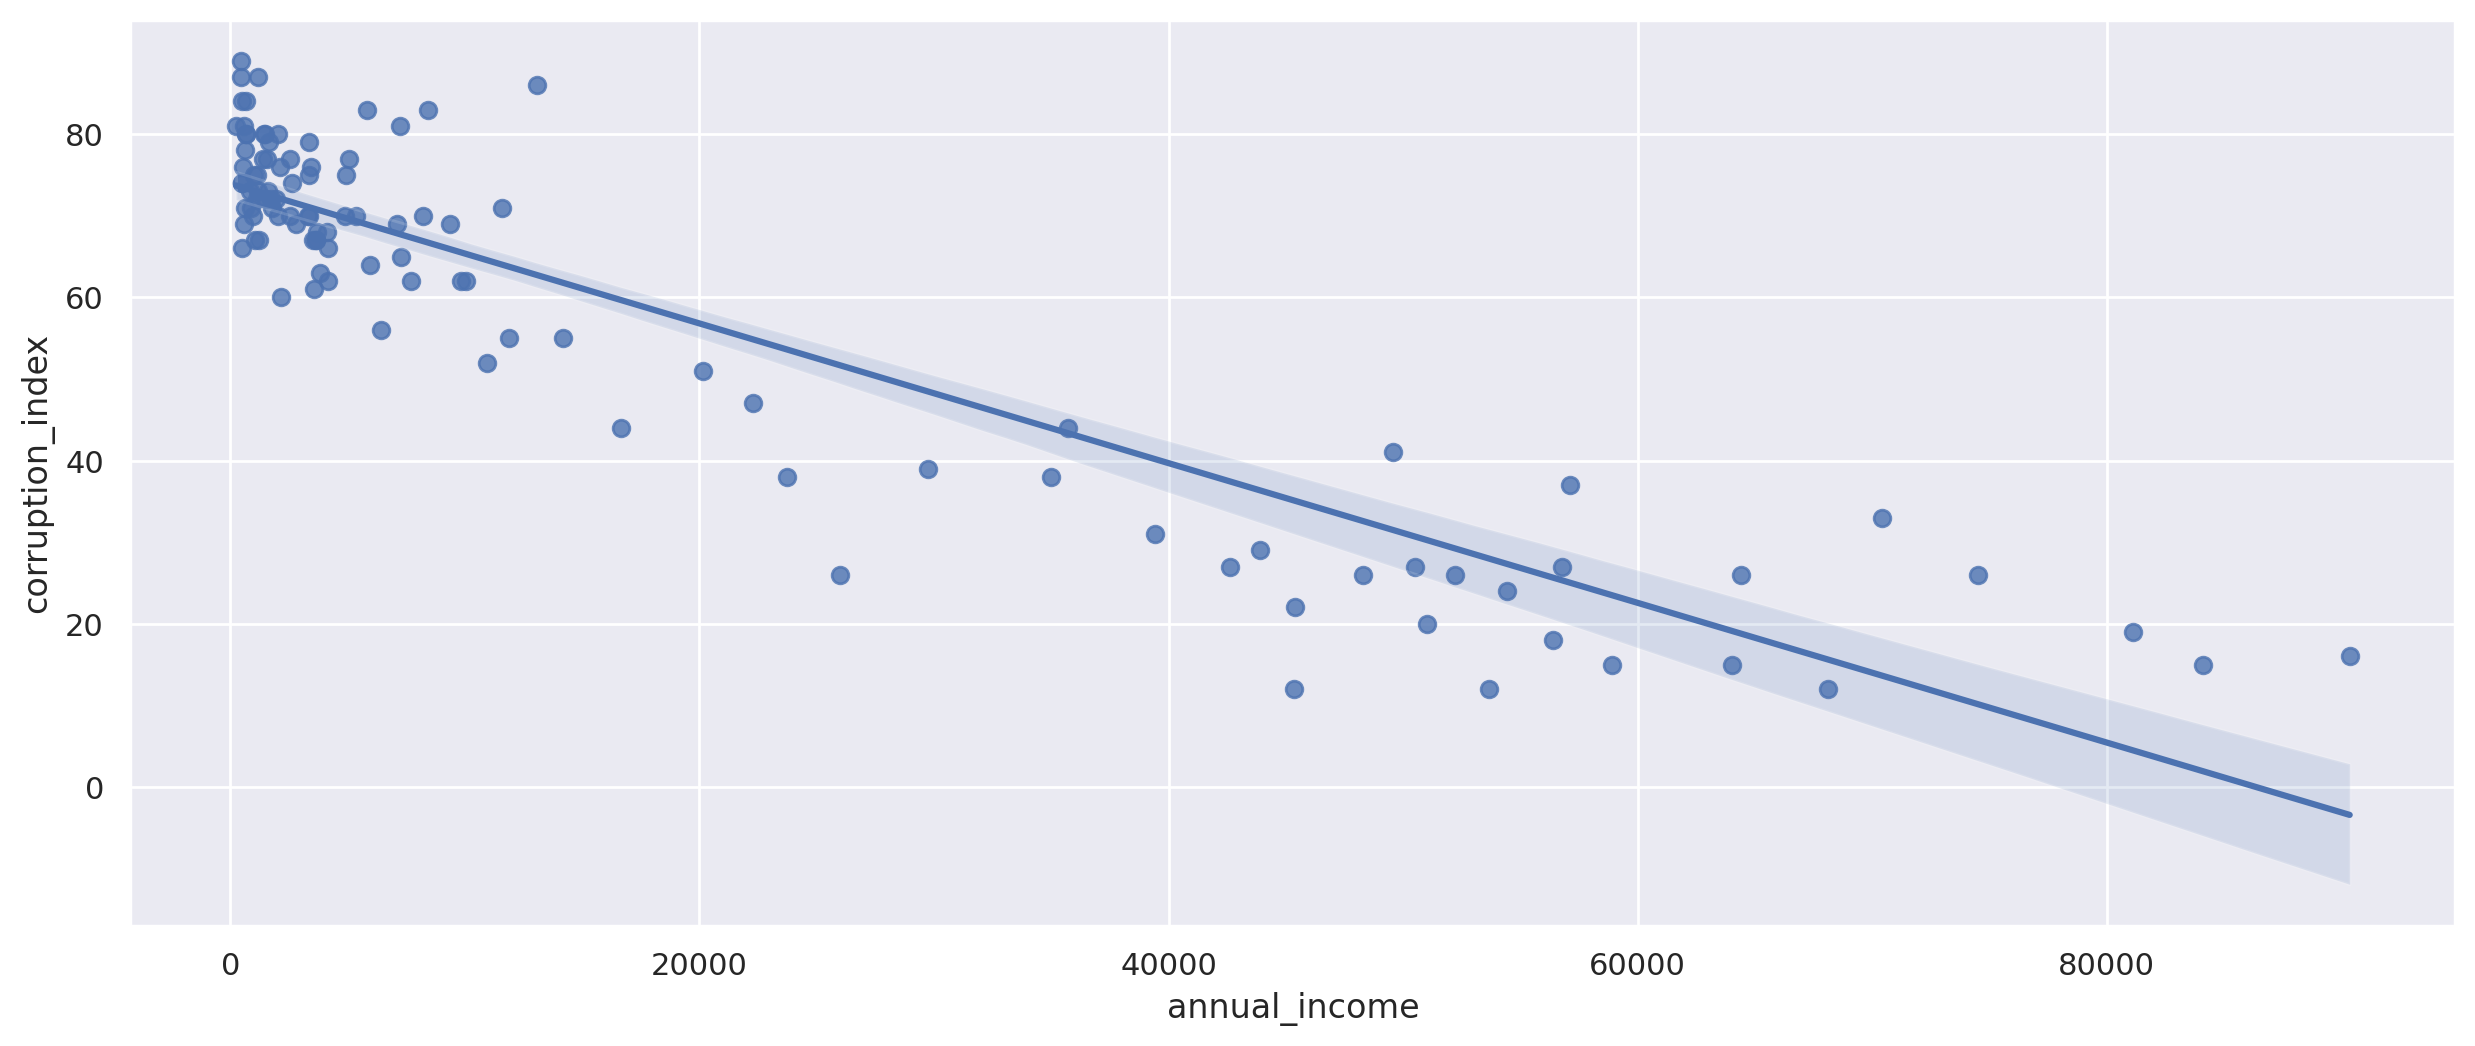

In [66]:
# annual_income Vs. corruption_index for all the countries
plt.figure(figsize=(15,6),dpi=200)
sns.regplot(data=corruption_df, x='annual_income', y='corruption_index', marker="o")
plt.show();

> #### There is a clear negative linear relation between annual income and corruption index and it can be seen from the Above scatter plot. If annual income increases corruption index decreases for a country and vice versa.

### Cost of Living Dataframe

In [67]:
cost_of_living_df = pd.read_csv("/kaggle/input/world-economic-data/cost_of_living.csv")
# First 5 rows in the dataframe
cost_of_living_df.head()

,country,cost_index,monthly_income,purchasing_power_index
0,Bermuda,157.6,9712,105.0
1,Switzerland,142.4,7530,90.1
2,Cayman Islands,137.9,5281,65.2
3,Israel,130.2,4130,54.1
4,Iceland,128.0,5368,71.5


In [68]:
# Checking the shape of data frame
cost_of_living_df.shape

(107, 4)

In [69]:
# Checking DataFrame for total no.of unique entries

len(cost_of_living_df['country'].unique())

# As count is same as no.of rows, hence no duplicate countries in the dataframe

107

In [70]:
# Checking for null values
cost_of_living_df.isna().sum()

country                   0
cost_index                0
monthly_income            0
purchasing_power_index    0
dtype: int64

In [71]:
# Checking for correlation between various columns in the dataframe
cost_of_living_df.corr()

,cost_index,monthly_income,purchasing_power_index
cost_index,1.000000,0.872141,0.709241
monthly_income,0.872141,1.000000,0.918266
purchasing_power_index,0.709241,0.918266,1.000000


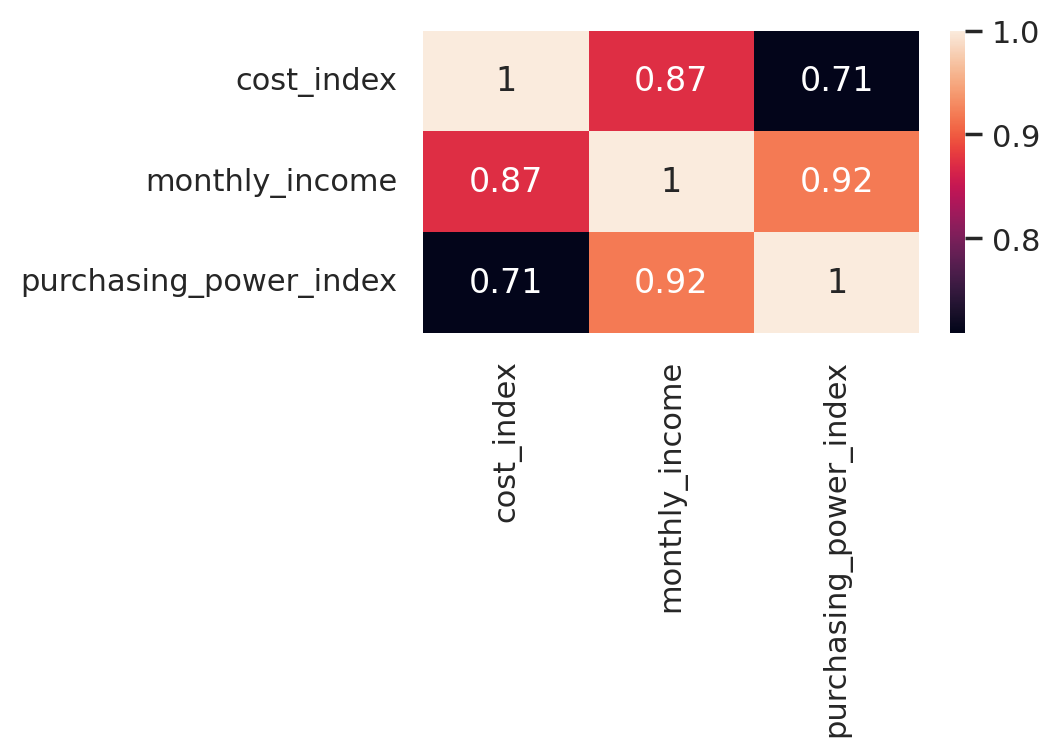

In [72]:
# Heatmap for cost_of_living_df

plt.figure(figsize=(4,2),dpi=200)
sns.heatmap(cost_of_living_df.corr(),annot=True)
plt.show();

In [73]:
# General information about dataframe

cost_of_living_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 107 non-null    object 
 1   cost_index              107 non-null    float64
 2   monthly_income          107 non-null    int64  
 3   purchasing_power_index  107 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.5+ KB


In [74]:
# Statistical information about dataframe

cost_of_living_df.describe()

,cost_index,monthly_income,purchasing_power_index
count,107.000000,107.000000,107.000000
mean,62.555140,1826.532710,38.150467
std,33.747716,2100.275033,30.588024
min,22.800000,87.000000,3.400000
25%,36.400000,295.000000,14.050000
50%,48.900000,782.000000,25.800000
75%,84.550000,3130.000000,59.100000
max,157.600000,9712.000000,121.100000


##### **Regplots with scatter**

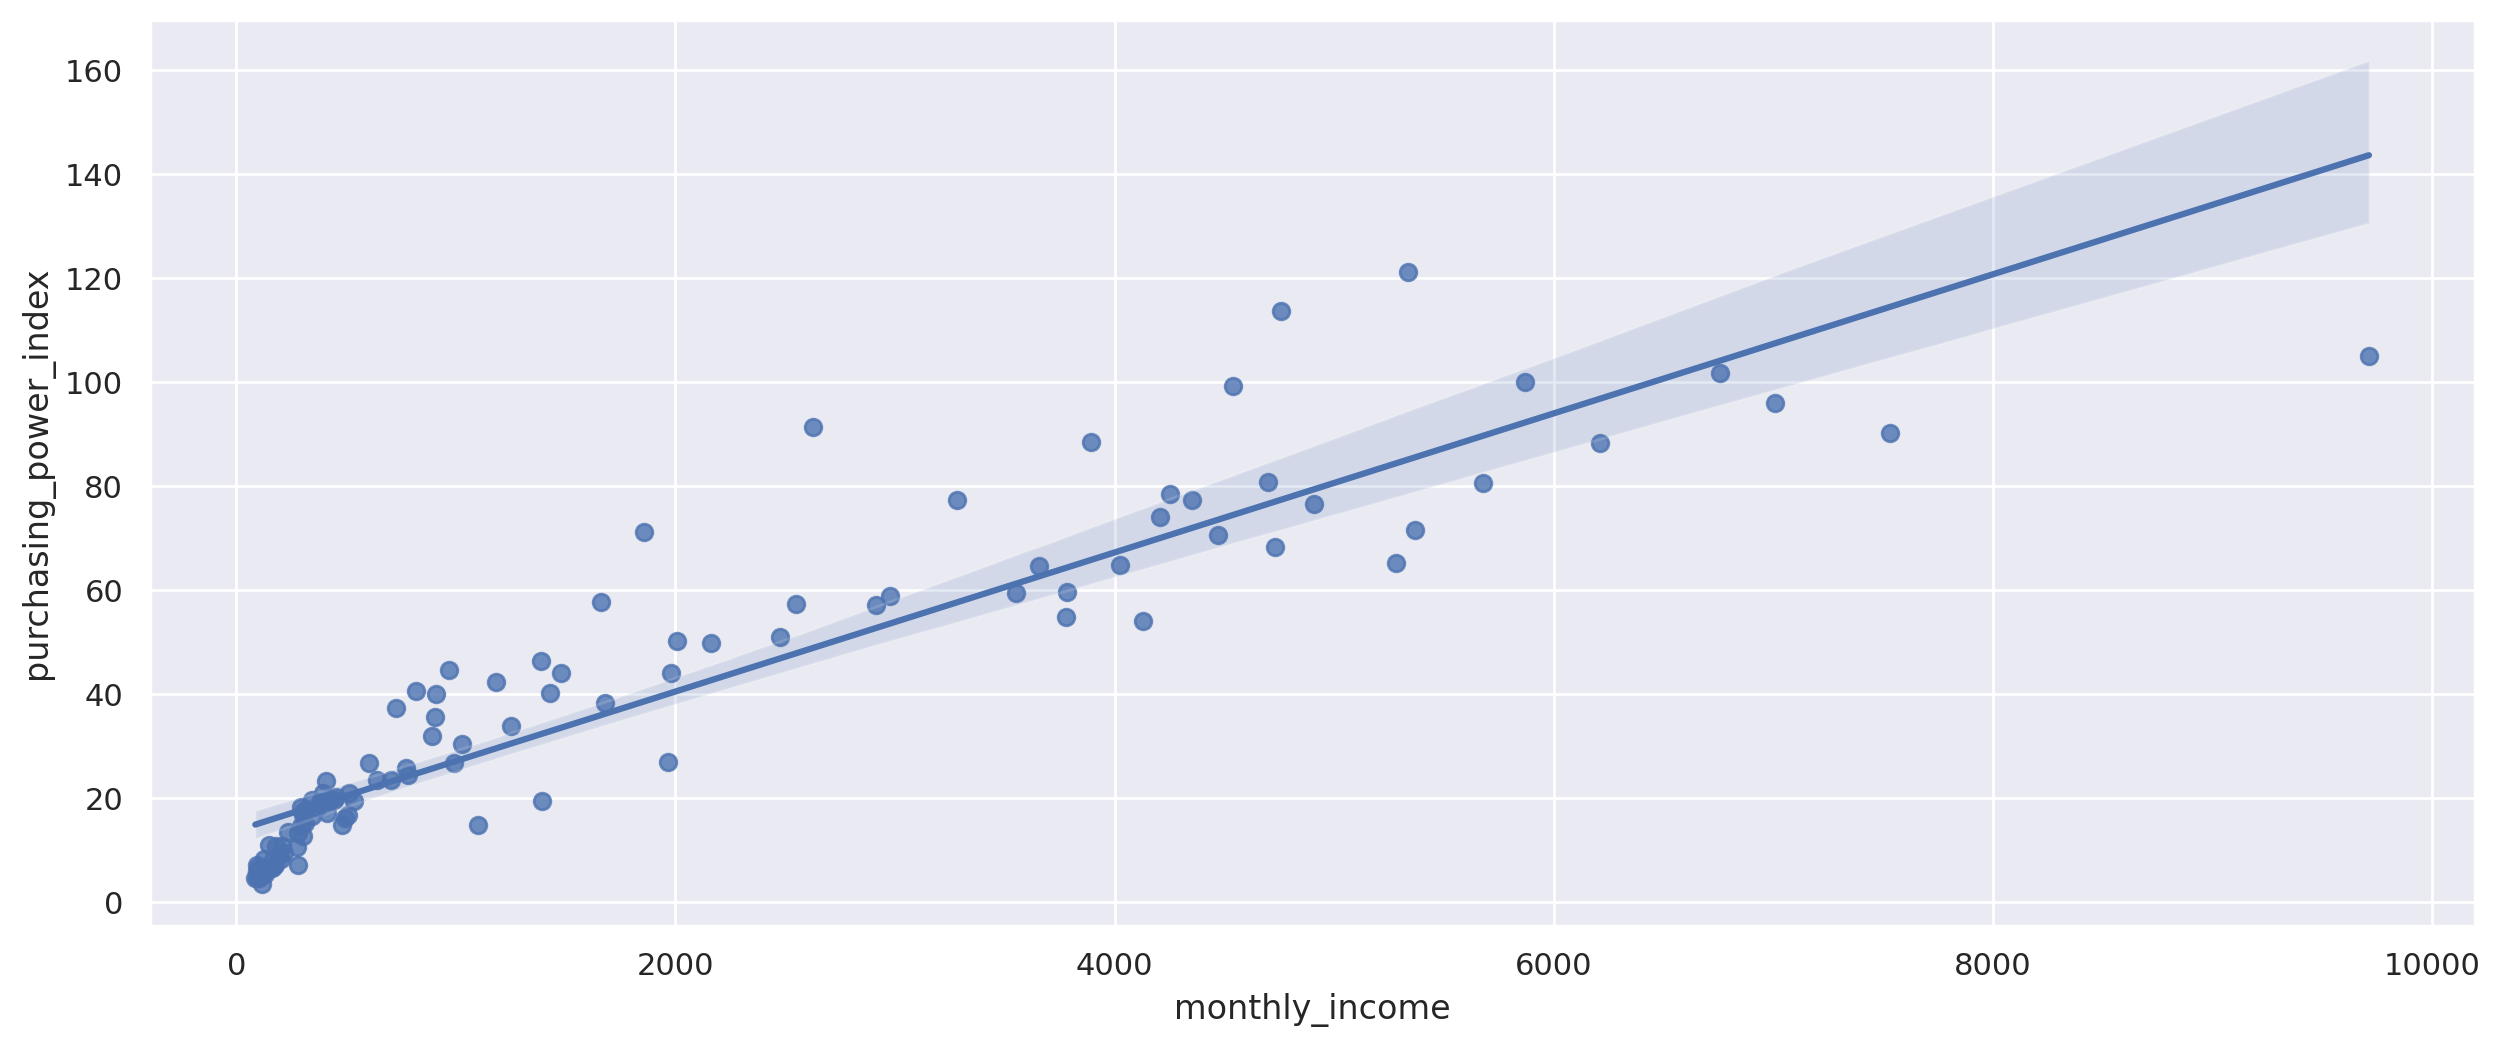

In [75]:
# monthly_income Vs. purchasing_power_index for all the countries
plt.figure(figsize=(15,6),dpi=200)
sns.regplot(data=cost_of_living_df, x='monthly_income', y='purchasing_power_index', marker="o")
plt.show();

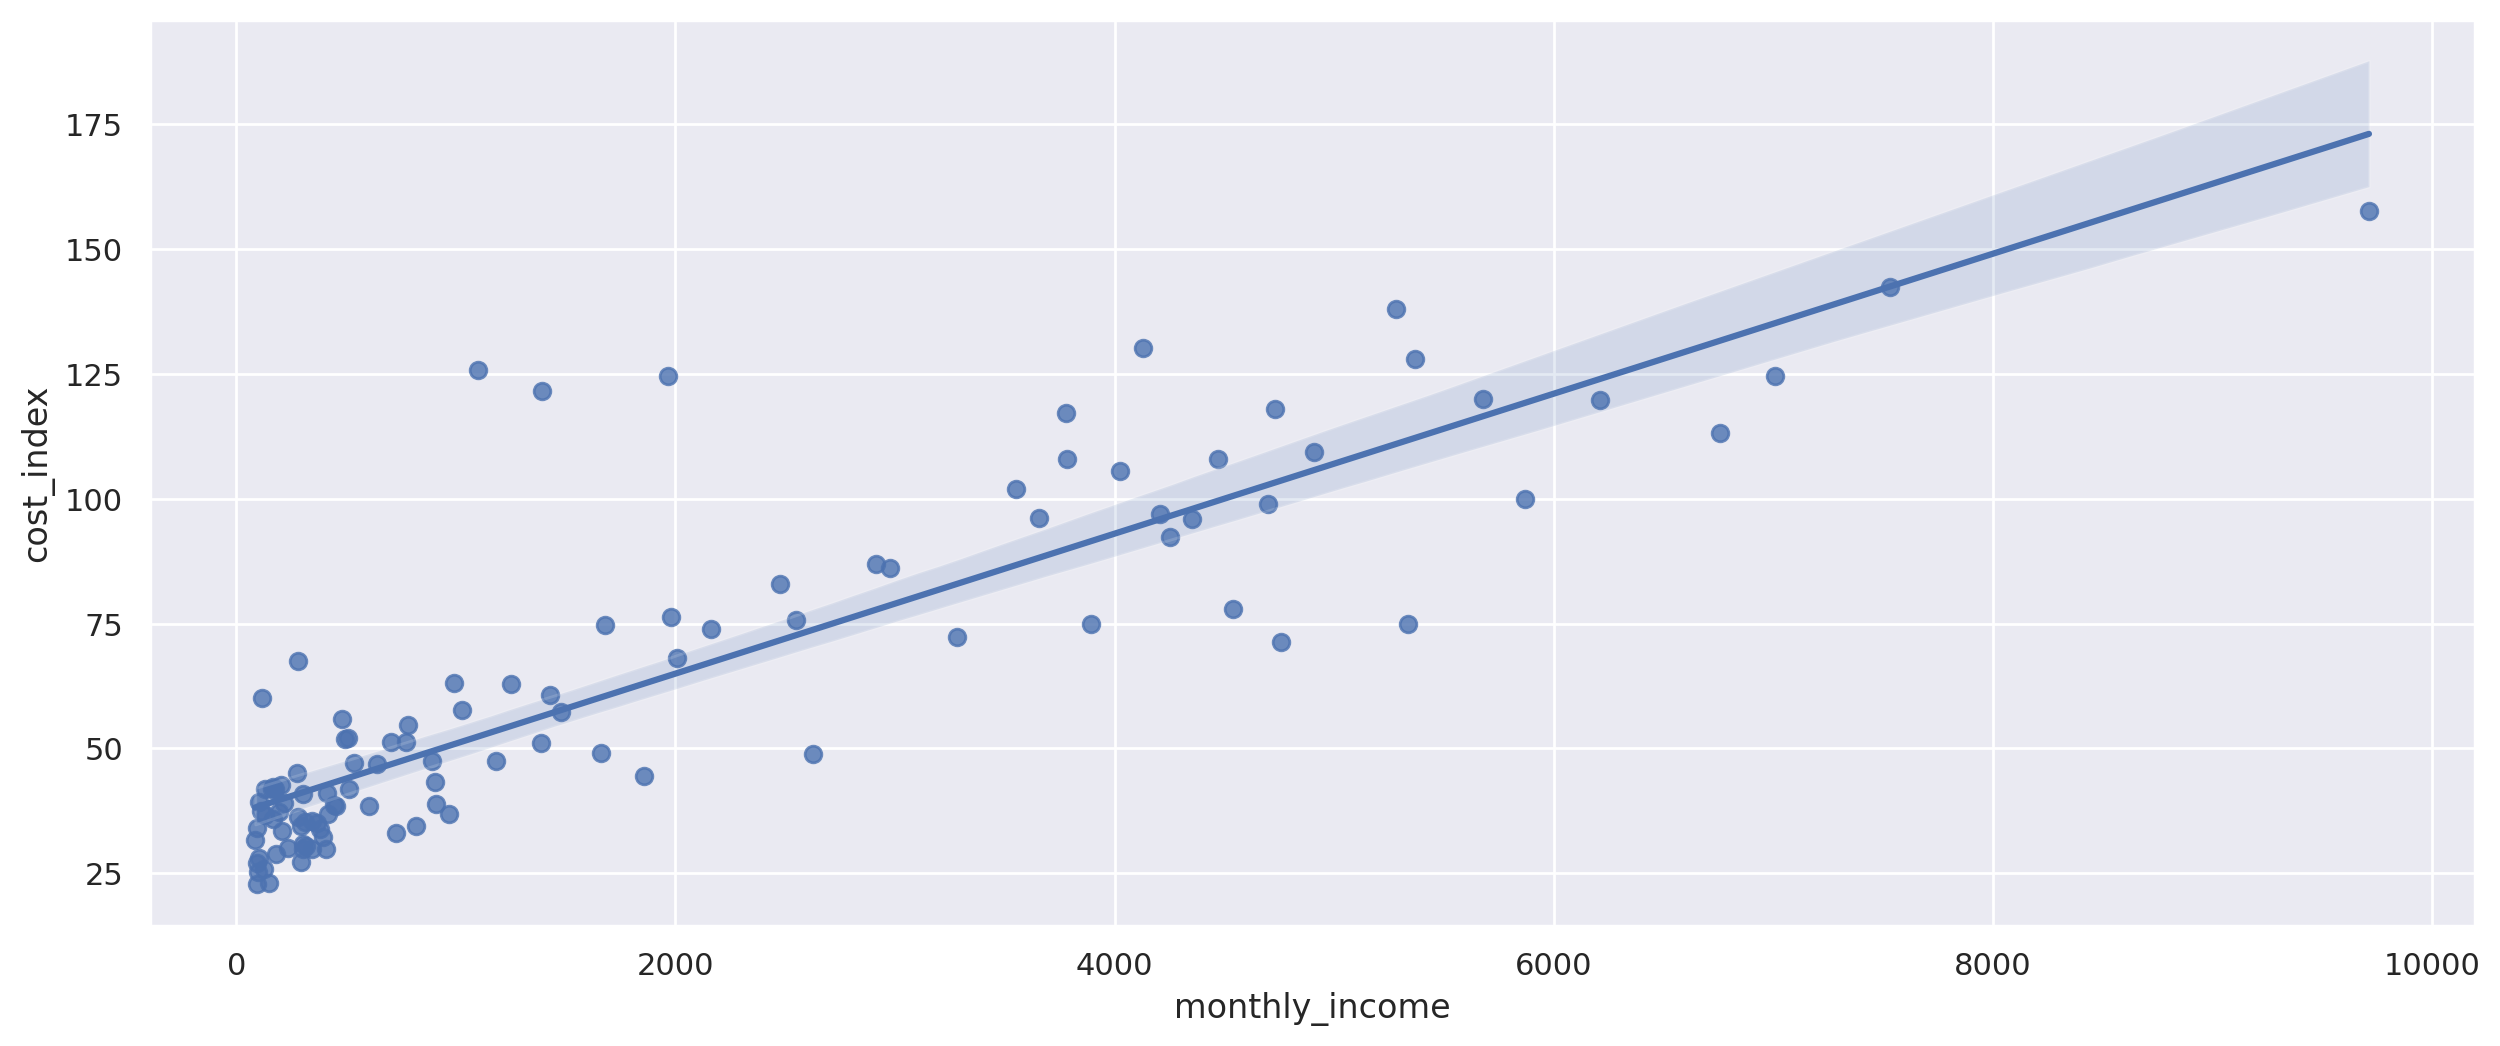

In [76]:
# monthly_income Vs. cost_index for all the countries
plt.figure(figsize=(15,6),dpi=200)
sns.regplot(data=cost_of_living_df, x='monthly_income', y='cost_index', marker="o")
plt.show();

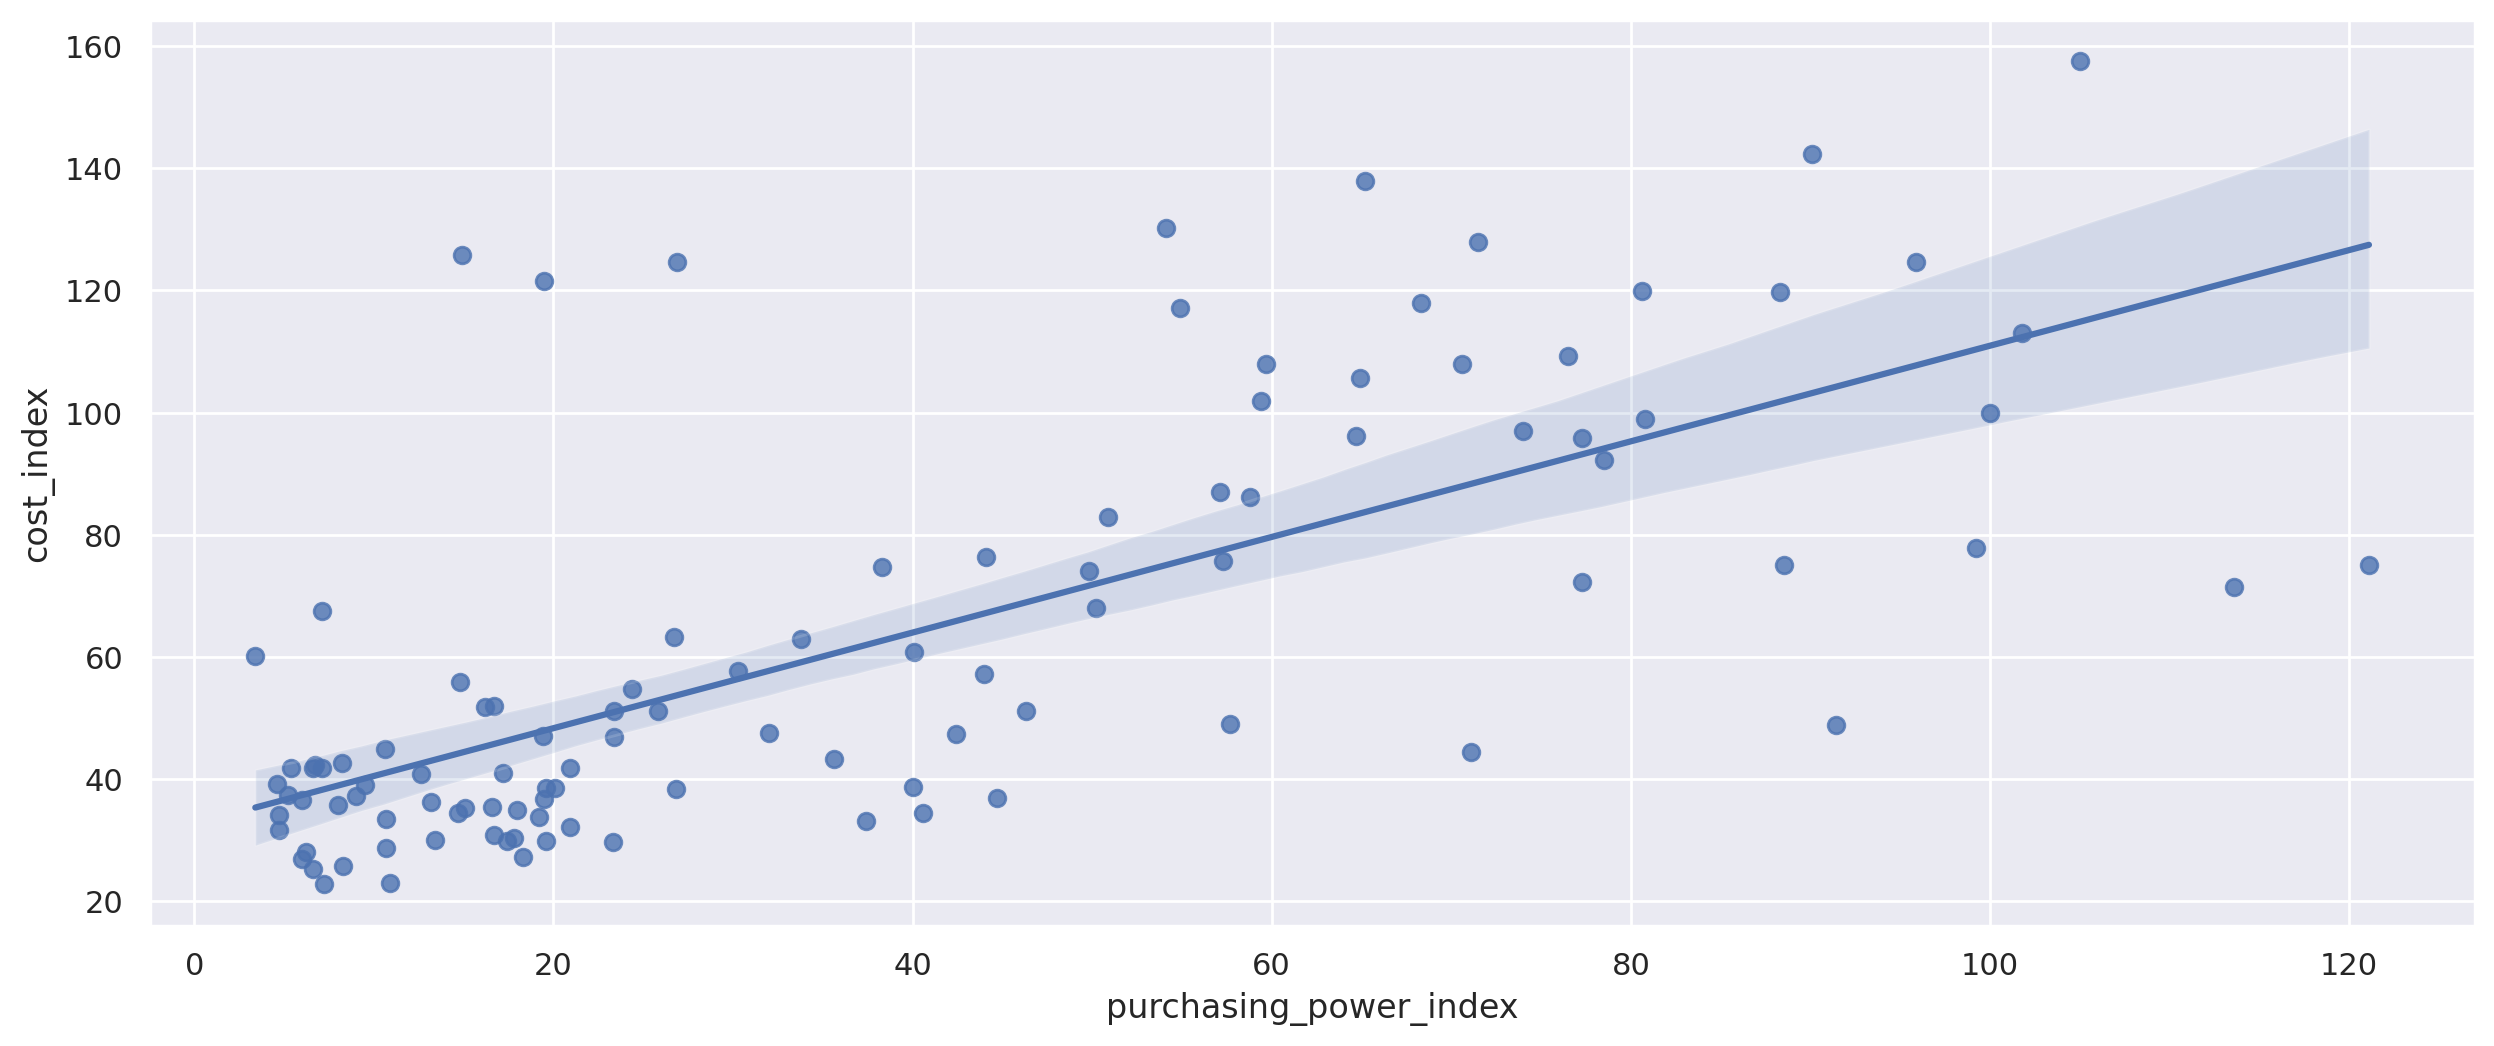

In [77]:
# purchasing_power_index Vs. cost_index for all the countries
plt.figure(figsize=(15,6),dpi=200)
sns.regplot(data=cost_of_living_df, x='purchasing_power_index', y='cost_index', marker="o")
plt.show();

> #### There is a clear positive linear relationship between "monthly_income", "purchasing_power_index" and "cost_index".

##### **country vs. monthly_income**

<AxesSubplot:xlabel='country'>

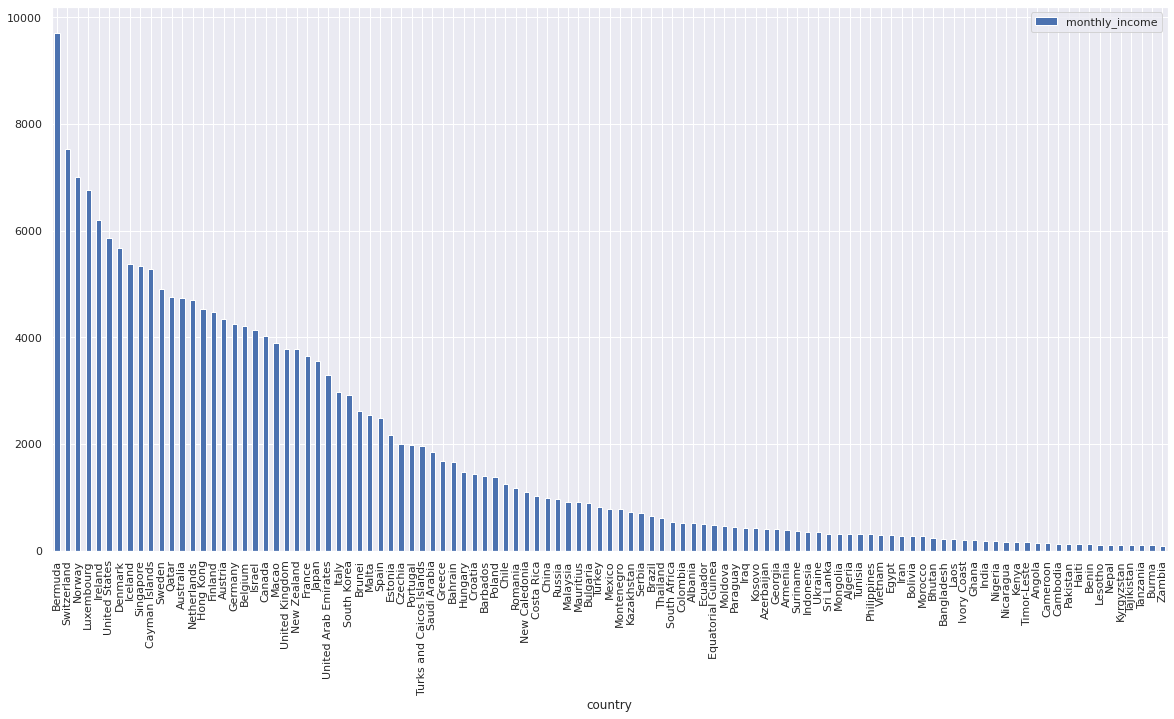

In [78]:
# Countries in accordance with monthly_income
monthly_income_cost_of_living_df = cost_of_living_df.sort_values(by='monthly_income',ascending=False)
monthly_income_cost_of_living_df.plot(y='monthly_income', x='country', rot=90, kind='bar', figsize=(20,10))

In [79]:
# Top 10 countries in accordance with monthly_income
top10_monthly_income_cost_of_living_df = cost_of_living_df.sort_values(by='monthly_income',ascending=False)[:10]
top10_monthly_income_cost_of_living_df

,country,cost_index,monthly_income,purchasing_power_index
0,Bermuda,157.6,9712,105.0
1,Switzerland,142.4,7530,90.1
7,Norway,124.6,7008,95.9
13,Luxembourg,113.1,6759,101.8
10,Ireland,119.8,6210,88.3
19,United States,100.0,5869,100.0
9,Denmark,119.9,5676,80.6
4,Iceland,128.0,5368,71.5
31,Singapore,75.0,5334,121.1
2,Cayman Islands,137.9,5281,65.2


<AxesSubplot:xlabel='country'>

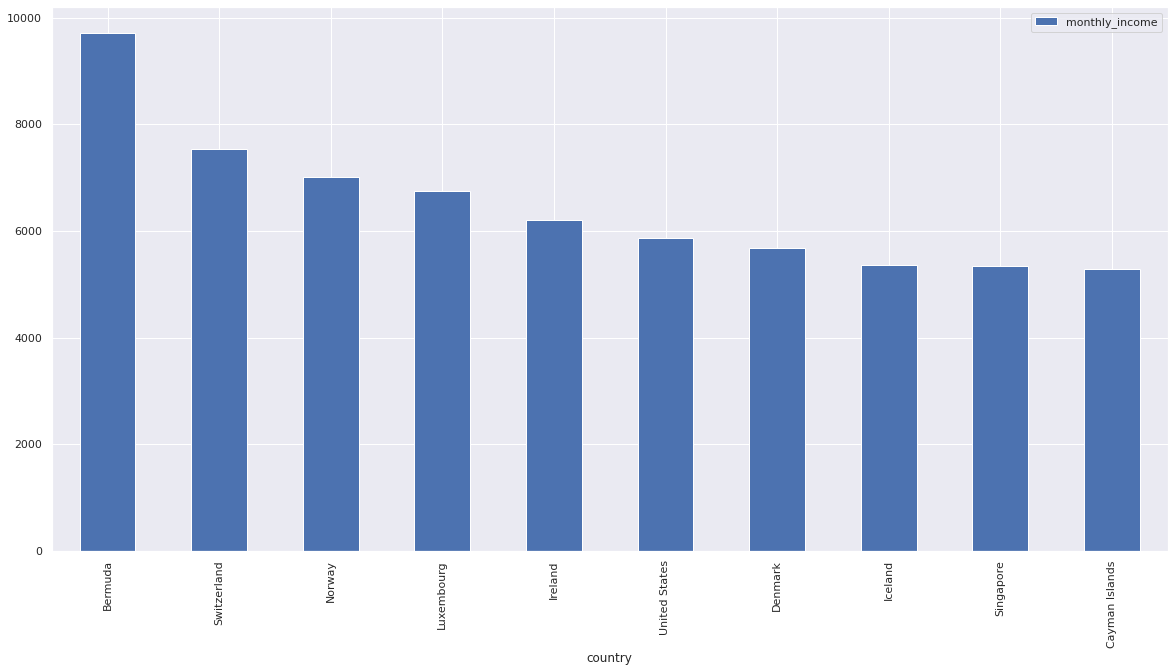

In [80]:
# Top 10 countries in accordance with monthly_income
top10_monthly_income_cost_of_living_df.plot(y='monthly_income', x='country', rot=90, kind='bar', figsize=(20,10))

##### **country vs. purchasing_power_index**

<AxesSubplot:xlabel='country'>

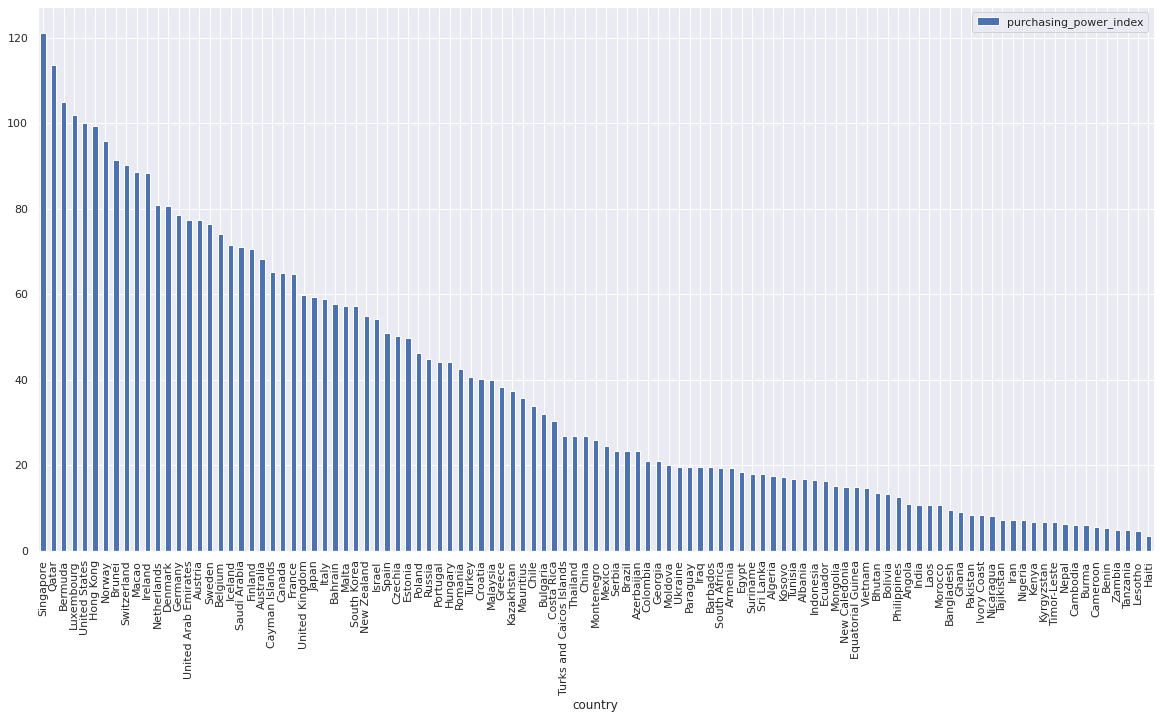

In [81]:
# Countries in accordance with purchasing_power_index
purchasing_power_index_cost_of_living_df = cost_of_living_df.sort_values(by='purchasing_power_index',ascending=False)
purchasing_power_index_cost_of_living_df.plot(y='purchasing_power_index', x='country', rot=90, kind='bar', figsize=(20,10))

In [82]:
# Top 10 countries in accordance with purchasing_power_index
top10_purchasing_power_index_cost_of_living_df = cost_of_living_df.sort_values(by='purchasing_power_index',ascending=False)[:10]
top10_purchasing_power_index_cost_of_living_df

,country,cost_index,monthly_income,purchasing_power_index
31,Singapore,75.0,5334,121.1
36,Qatar,71.4,4760,113.6
0,Bermuda,157.6,9712,105.0
13,Luxembourg,113.1,6759,101.8
19,United States,100.0,5869,100.0
28,Hong Kong,77.9,4538,99.2
7,Norway,124.6,7008,95.9
53,Brunei,48.9,2626,91.4
1,Switzerland,142.4,7530,90.1
32,Macao,75.0,3894,88.5


<AxesSubplot:xlabel='country'>

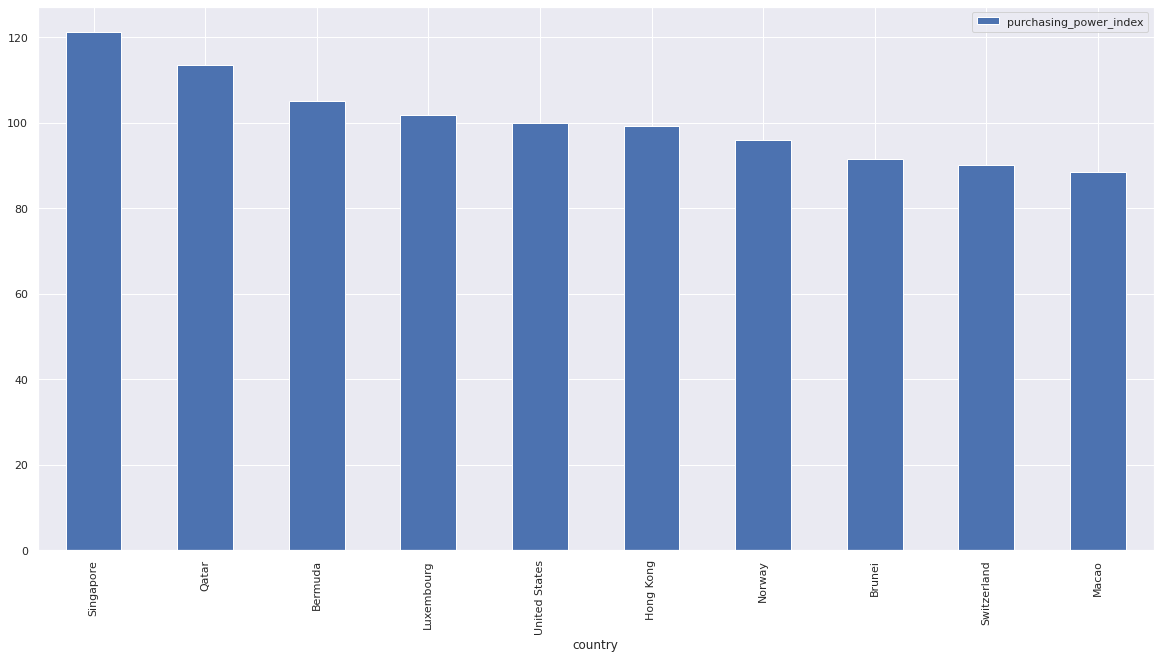

In [83]:
# Top 10 countries in accordance with purchasing_power_index
top10_purchasing_power_index_cost_of_living_df.plot(y='purchasing_power_index', x='country', rot=90, kind='bar', figsize=(20,10))

##### **country vs. cost_index**

<AxesSubplot:xlabel='country'>

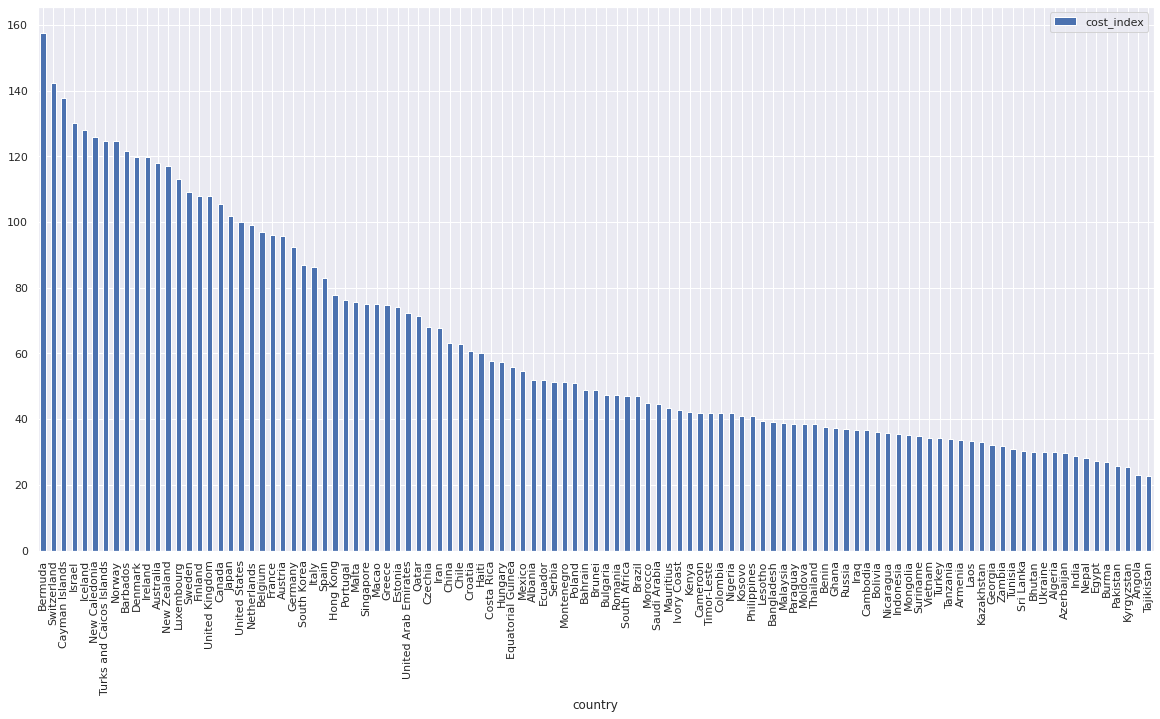

In [84]:
# Countries in accordance with cost_index
cost_index_cost_of_living_df = cost_of_living_df.sort_values(by='cost_index',ascending=False)
cost_index_cost_of_living_df.plot(y='cost_index', x='country', rot=90, kind='bar', figsize=(20,10))

In [85]:
# Top 10 countries in accordance with cost_index
top10_cost_index_cost_of_living_df = cost_of_living_df.sort_values(by='cost_index',ascending=False)[:10]
top10_cost_index_cost_of_living_df

,country,cost_index,monthly_income,purchasing_power_index
0,Bermuda,157.6,9712,105.0
1,Switzerland,142.4,7530,90.1
2,Cayman Islands,137.9,5281,65.2
3,Israel,130.2,4130,54.1
4,Iceland,128.0,5368,71.5
5,New Caledonia,125.8,1101,14.9
6,Turks and Caicos Islands,124.6,1967,26.9
7,Norway,124.6,7008,95.9
8,Barbados,121.5,1393,19.5
9,Denmark,119.9,5676,80.6


<AxesSubplot:xlabel='country'>

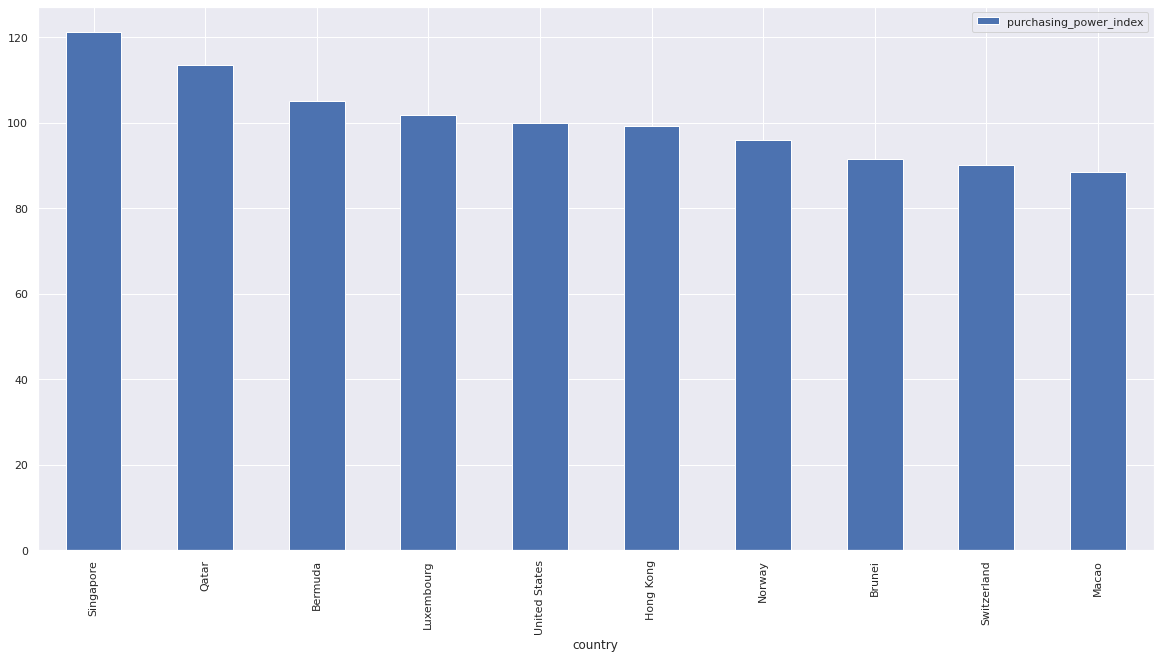

In [86]:
# Top 10 countries in accordance with purchasing_power_index
top10_purchasing_power_index_cost_of_living_df.plot(y='purchasing_power_index', x='country', rot=90, kind='bar', figsize=(20,10))

##### **monthly_income**

In [87]:
# Average of monthly_income across countries

monthly_income_cost_of_living_df['monthly_income'].mean()

1826.5327102803737

In [88]:
# No.of countries with montly_income above Average

len(monthly_income_cost_of_living_df[monthly_income_cost_of_living_df['monthly_income'] >= (monthly_income_cost_of_living_df['monthly_income'].mean())])

# There are 37 countries with montly_income above Average

37

##### **purchasing_power_index**

In [89]:
# Average of purchasing_power_index across countries

purchasing_power_index_cost_of_living_df['purchasing_power_index'].mean()

38.15046728971962

In [90]:
# No.of countries with purchasing_power_index above Average

len(purchasing_power_index_cost_of_living_df[purchasing_power_index_cost_of_living_df['purchasing_power_index'] >= (purchasing_power_index_cost_of_living_df['purchasing_power_index'].mean())])

# There are 45 countries with purchasing_power_index above Average

45

##### **cost_index**

In [91]:
# Average of cost_index across countries

cost_index_cost_of_living_df['cost_index'].mean()

62.555140186915885

In [92]:
# No.of countries with cost_index above Average

len(cost_index_cost_of_living_df[cost_index_cost_of_living_df['cost_index'] >= (cost_index_cost_of_living_df['cost_index'].mean())])

# There are 41 countries with cost_index above Average

41

> #### The Countries - Bermuda, Switzerland and Norway are top 3 in terms of montly_income and continue to exist in top 10 interms of purchasing_power_index and cost_index, which indicates the strong positive correlation between the features.

### **End of the Analysis, Thanks for Watching**.